In [31]:
#imports
import PIL
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import cv2
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import sys
import pandas as pd
from numpy.linalg import inv
from sklearn import metrics
import cmath
import time


In [2]:
def loadImages(path):
    result = [] 
    folders = sorted(os.listdir(path))
    folders.remove('README')
    for folder in folders:
            images = os.listdir(os.path.join(path, folder))
            for image in images:
                im = Image.open(os.path.join(path, os.path.join(folder, image)))
                im = im.convert("L")
                im = np.asarray(im,dtype = np.uint8)
                im = im.flatten()
                result.append(im)
    return np.array(result)

In [3]:
X=loadImages('/kaggle/input/att-database-of-faces')

In [4]:
X.shape

(400, 10304)

In [5]:
#create label array
y=np.zeros(shape=(400,1))
test=sorted(os.listdir('/kaggle/input/att-database-of-faces'))
test.remove('README')
for i in range (0,400,10):
    index=int(i/10)
    for j in range(0,10):
        y[i+j]=test[index][1:]

In [6]:
def Train_Test_split(x,y):
    x_train = np.zeros(shape=(200, 10304))
    x_test = np.zeros(shape=(200,10304))
    y_train = np.zeros(shape=(200, 1))
    y_test = np.zeros(shape=(200,1))
    i_odd,i_even = 0, 0
    for i in range (0,400):
        if i%2 != 0:
            x_train[i_odd] = x[i]
            y_train[i_odd] = y[i]
            i_odd+=1
        else:
            x_test[i_even] = x[i]
            y_test[i_even] = y[i]
            i_even+=1
    return x_train,x_test,y_train,y_test

In [7]:
x_train,x_test,y_train,y_test=Train_Test_split(X,y)

In [8]:
class PCA:
    def __init__( self, alpha):
        self.alpha = alpha
        self.Ur=None
        
    def fit( self, X ):
        mean=np.mean(X,axis=0) #mean
        Z=X-mean # centered
        cov = (1/len(Z))*np.matmul(Z.T,Z) #covariance matrix
        
        #calculate eigvalues and eigvectors (make use of covariance symmetry and use eigh)
        eig_vals, eig_vecs = np.linalg.eigh(cov)
        
        sumOfEigVal=np.sum(eig_vals) #denominator of total variance
        r=1
        while True :
            fr=np.sum(eig_vals[-r:])/sumOfEigVal #sum all -r eig values
            
            if fr >= self.alpha:
                break
            r+=1
    
        Ur=eig_vecs[:,-r:]
        self.Ur=Ur        
        print(f'for alpha = {self.alpha} , the number of important eighvectors are = {r}')
        
        
        return Ur
    
    def project(self,X):
        return X @ self.Ur
            #(200,10304) x (10304, r) = (200,r)
    def reconstruct_images(self,x_reduced):
        return x_reduced @ self.Ur.T
            #(200,r) x (r, 10304) = (200,10304) to be able to view it


In [9]:
%matplotlib inline
def show_images(images, num_images_to_show):
    fig = plt.figure()
    for i in range(1,num_images_to_show+1):
        fig.add_subplot(1,num_images_to_show,i)
        img = np.reshape( images[i-1,:], (112,92) )        
        plt.imshow(img, cmap='gray')

In [10]:
pca_8=PCA(0.8)
eigvectors_8=pca_8.fit(x_train)
x_train_reduced8=pca_8.project(x_train)
x_test_reduced8=pca_8.project(x_test)
neigh8 = KNeighborsClassifier(n_neighbors=1)
neigh8.fit(x_train_reduced8, y_train.ravel())
preds8=neigh8.predict(x_test_reduced8)

for alpha = 0.8 , the number of important eighvectors are = 36


In [11]:
pca_85=PCA(0.85)
eigvectors_85=pca_85.fit(x_train)
x_train_reduced85=pca_85.project(x_train)
x_test_reduced85=pca_85.project(x_test)
neigh85 = KNeighborsClassifier(n_neighbors=1)
neigh85.fit(x_train_reduced85, y_train.ravel())
preds85=neigh85.predict(x_test_reduced85)

for alpha = 0.85 , the number of important eighvectors are = 52


In [12]:
pca_9=PCA(0.9)
eigvectors_9=pca_9.fit(x_train)
x_train_reduced9=pca_9.project(x_train)
x_test_reduced9=pca_9.project(x_test)
neigh9 = KNeighborsClassifier(n_neighbors=1)
neigh9.fit(x_train_reduced9, y_train.ravel())
preds9=neigh9.predict(x_test_reduced9)

for alpha = 0.9 , the number of important eighvectors are = 76


In [13]:
pca_95=PCA(0.95)
eigvectors_95=pca_95.fit(x_train)
x_train_reduced95=pca_95.project(x_train)
x_test_reduced95=pca_95.project(x_test)
neigh95 = KNeighborsClassifier(n_neighbors=1)
neigh95.fit(x_train_reduced95, y_train.ravel())
preds95=neigh95.predict(x_test_reduced95)

for alpha = 0.95 , the number of important eighvectors are = 116


In [14]:
#accuracy
print(f'accuracy for alpha=0.95  is {accuracy_score(y_test, preds95)}')
print(f'accuracy for alpha=0.9  is {accuracy_score(y_test, preds9)}')
print(f'accuracy for alpha=0.85  is {accuracy_score(y_test, preds85)}')
print(f'accuracy for alpha=0.8  is {accuracy_score(y_test, preds8)}')

accuracy for alpha=0.95  is 0.965
accuracy for alpha=0.9  is 0.97
accuracy for alpha=0.85  is 0.975
accuracy for alpha=0.8  is 0.97


most important eigen faces based on their eigen values (from right to left)


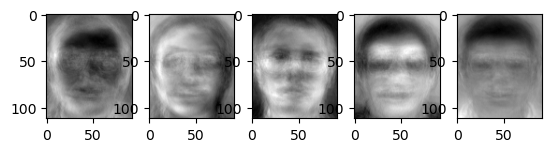

In [15]:
print("most important eigen faces based on their eigen values (from right to left)")
show_images(eigvectors_85.T[-5:],5)

In [16]:
reconstructed_x_train=pca_85.reconstruct_images(x_train_reduced85)

reconstructed faces after being reduced to (nxr) instead of (nxd)
the number of important eighvectors are = 52 (200x52)


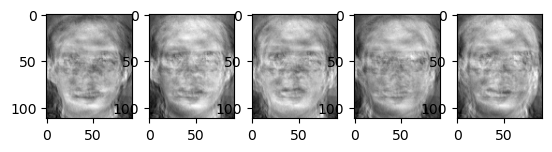

In [17]:
print("reconstructed faces after being reduced to (nxr) instead of (nxd)")
print("the number of important eighvectors are = 52 (200x52)")
show_images(reconstructed_x_train,5)

Original face before reducing the dims (200xd)


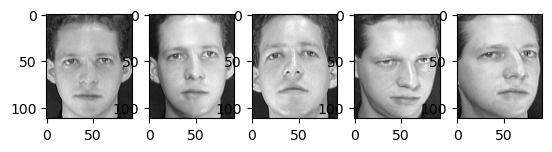

In [18]:
print("Original face before reducing the dims (200xd)")
show_images(x_train,5)

testing if we considered more than just 52 eigen vectors how the faces will look like after reconstruction

In [19]:
mean=np.mean(x_train,axis=0) #mean
Z=x_train-mean # centered
cov =(1/len(Z))*np.matmul(Z.T,Z) #covariance matrix
#calculate eigvalues and eigvectors (make use of covariance symmetry and use eigh)
eig_vals, eig_vecs = np.linalg.eigh(cov)

#after getting the eigvectors we can experiment the reconstruction of images while considering diffrent
#number of eigvectors

shape after reduction = (200, 10304)
shape after reconstruction = (200, 10304)
reconstruction after considering all eig_vecs

reconstruction after considering 500
shape after reconstruction = (200, 10304)

reconstruction after considering 50
shape after reconstruction = (200, 10304)


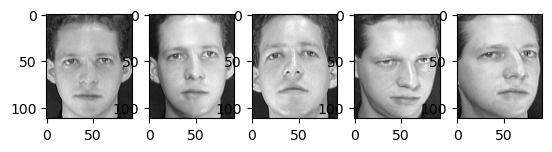

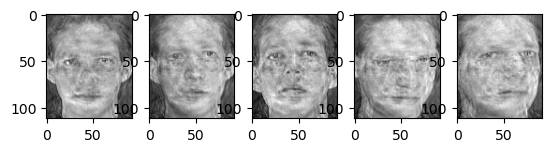

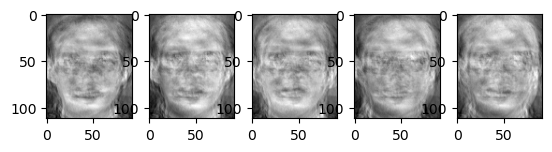

In [20]:
test_proj= x_train @ eig_vecs
#(200,10304) x (10304, r) = (200,r)
print(f'shape after reduction = {test_proj.shape}')

reconstructed= test_proj @ eig_vecs.T
#(200,r) x (r, 10304) = (200,10304) to be able to view it
print(f'shape after reconstruction = {reconstructed.shape}')

print("reconstruction after considering all eig_vecs")
show_images(reconstructed,5)

print()

print("reconstruction after considering 500")
test_proj= x_train @ eig_vecs[:,-500:]
reconstructed= test_proj @ eig_vecs[:,-500:].T
print(f'shape after reconstruction = {reconstructed.shape}')
show_images(reconstructed,5)
print()

print("reconstruction after considering 50")
test_proj= x_train @ eig_vecs[:,-50:]
reconstructed= test_proj @ eig_vecs[:,-50:].T
print(f'shape after reconstruction = {reconstructed.shape}')
show_images(reconstructed,5)


[0.97, 0.905, 0.825, 0.78]


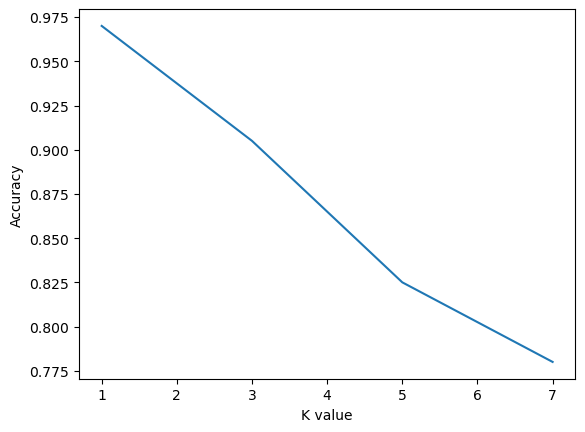

In [21]:
k_nearest=[1,3,5,7]
scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced8,y_train.ravel())
    preds=classifier.predict(x_test_reduced8)
    scores.append(accuracy_score(y_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores)
print(scores)

[0.975, 0.91, 0.84, 0.765]


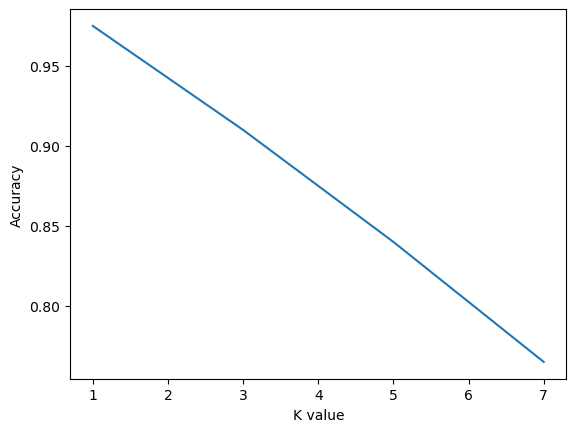

In [22]:
k_nearest=[1,3,5,7]
scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced85,y_train.ravel())
    preds=classifier.predict(x_test_reduced85)
    scores.append(accuracy_score(y_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores)
print(scores)

[0.97, 0.905, 0.83, 0.775]


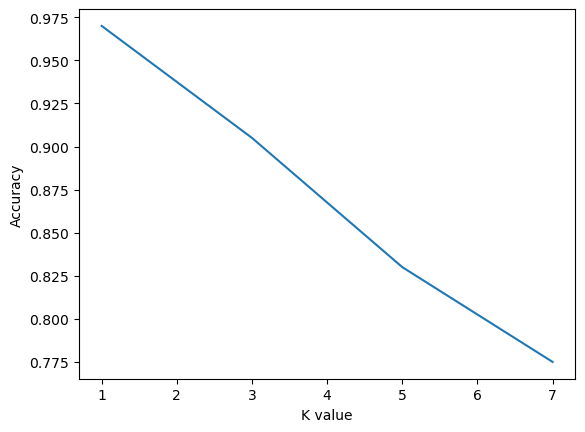

In [23]:
k_nearest=[1,3,5,7]
scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced9,y_train.ravel())
    preds=classifier.predict(x_test_reduced9)
    scores.append(accuracy_score(y_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores)
print(scores)

[0.965, 0.9, 0.835, 0.79]


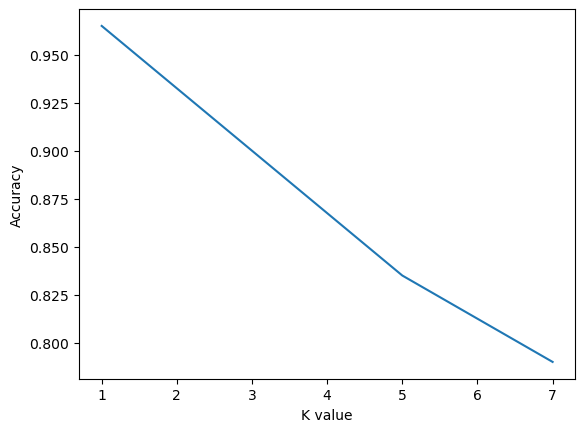

In [24]:
k_nearest=[1,3,5,7]
scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced95,y_train.ravel())
    preds=classifier.predict(x_test_reduced95)
    scores.append(accuracy_score(y_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores)
print(scores)

In [25]:
def importResizeImages(path,noOfImgToImport):
    result = []
    images = sorted(os.listdir(path))
    for image in images:
        im = Image.open(os.path.join(path,image))
        im = im.resize((92, 112))
        im = im.convert("L")
        im = np.asarray(im,dtype = np.uint8)
        im = im.flatten()
        result.append(im)
    return np.array(result)[:noOfImgToImport]

In [26]:
del pca_8,eigvectors_8,x_train_reduced8,x_test_reduced8,neigh8,preds8
del pca_85,eigvectors_85,x_train_reduced85,x_test_reduced85,neigh85,preds85
del pca_9,eigvectors_9,x_train_reduced9,x_test_reduced9,neigh9,preds9
del pca_95,eigvectors_95,x_train_reduced95,x_test_reduced95,neigh95,preds95

del mean,Z,cov,eig_vals, eig_vecs

del test_proj,reconstructed


# LDA

In [27]:
def nonfacesplit(nonfaceNo,Xfaces,testSize):
    adidas = importResizeImages('/kaggle/input/nike-adidas-and-converse-imaged/train/adidas',int(nonfaceNo/4))
    furniture = importResizeImages('/kaggle/input/furniture-images-dataset/furniture_images/furniture_images',int(nonfaceNo/4))
    coca =importResizeImages('/kaggle/input/pepsi-and-cocacola-images/train/cocacola',int(nonfaceNo/4))
    pepsi = importResizeImages('/kaggle/input/pepsi-and-cocacola-images/train/pepsi',int(nonfaceNo/4))

    nonfaces = np.concatenate((adidas, furniture, coca, pepsi), axis=0)

    bin_data=np.concatenate((Xfaces,nonfaces))

    bin_labels=np.concatenate((np.ones((400,1)),np.zeros((nonfaceNo,1))))

    from sklearn.model_selection import train_test_split
    return train_test_split(bin_data, bin_labels,stratify=bin_labels,test_size=testSize,random_state = 42)

In [28]:
class LDA:
    def __init__(self,x_train,x_test,y_train,y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.Us = None
    def fitNaive(self):
        df = pd.DataFrame(self.x_train)
        df['label']=self.y_train
        indx = len(self.y_train)/40
        means = np.array(df.groupby('label').mean())
        overallmean = np.mean(self.x_train,axis=0)
        Sb = np.zeros((10304,10304))
        temp = means - overallmean
        for i in range(40):
            x = temp[i][np.newaxis].T
            Sb = Sb + indx*(x @ x.T)
        S = np.zeros((10304,10304))
        for i in range(40):
            tempo = np.array(df[df['label']==i].drop(['label'],axis=1) - means[i])
            stemp = tempo.T @ tempo
            S = S + stemp
        Sinv = np.linalg.inv(S)
        Final = Sinv @ Sb
        eigvalues,eigvectors = np.linalg.eigh(Final)
        idx2 = eigvalues.argsort()[::-1]
        self.Us = eigvectors
        return self.Us
    def fitNon(self):
        df = pd.DataFrame(self.x_train)
        df['label']=self.y_train
        means = np.array(df.groupby('label').mean())
        temp = means[0] - means[1]
        B = temp[np.newaxis].T @ temp[np.newaxis]
        Z1 = np.array(df[df['label']==0].drop(['label'],axis=1) - means[0])
        Z2 = np.array(df[df['label']==1].drop(['label'],axis=1) - means[1])
        S1 = Z1.T @ Z1
        S2 = Z2.T @ Z2
        S = S1 + S2
        Sinv = np.linalg.inv(S)
        Final = Sinv @ B
        eigvalues,eigvectors = np.linalg.eigh(Final)
        idx2 = eigvalues.argsort()[::-1]
        eigvectors=eigvectors[:,idx2]
        self.Us = eigvectors
        return self.Us
    def project(self,novecs,noknn,flag):
        U_LDA = self.Us[:,0:novecs]
        projectedtrain = self.x_train @ U_LDA
        projectedtest = self.x_test @ U_LDA
        neigh = KNeighborsClassifier(n_neighbors=noknn)
        neigh.fit(projectedtrain, self.y_train.ravel())
        preds=neigh.predict(projectedtest)
        accuracy = accuracy_score(self.y_test, preds)
        print("Accuracy for ",noknn , "NN = ",accuracy)
        if flag==1:
            confusion_matrix = metrics.confusion_matrix(self.y_test, preds)
            print("Total number of samples:",len(self.y_test))
            print("Number of success cases:",(confusion_matrix[0][0]+confusion_matrix[1][1]))
            print("Number of failure cases:",(confusion_matrix[0][1]+confusion_matrix[1][0]),"\n")
            cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NoneFace', 'Face'])
            cm_display.plot()
            plt.show()
        return accuracy

In [29]:
facesOnly = LDA(x_train,x_test,y_train,y_test)

In [32]:
start_time = time.time()
s = facesOnly.fitNaive()
end_time = time.time()

In [33]:
print((end_time - start_time)/60,"mins")

6.542779286702474 mins


In [34]:
print("Accuracy using First nearest neighbor:",scores[0]*100,'%')

Accuracy using First nearest neighbor: 96.5 %


Accuracy for  1 NN =  0.95
Accuracy for  3 NN =  0.895
Accuracy for  5 NN =  0.845
Accuracy for  7 NN =  0.805
[0.95, 0.895, 0.845, 0.805]


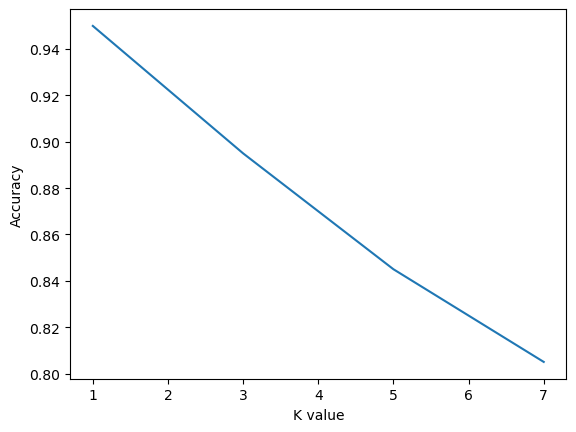

In [35]:
k_nearest = [1,3,5,7]
scores=[]
for k in k_nearest:   
    score = facesOnly.project(39,k,0)
    scores.append(score)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores)
print(scores)



Using 400 Face and 100 None face
Accuracy for  1 NN =  0.916
Total number of samples: 250
Number of success cases: 229
Number of failure cases: 21 



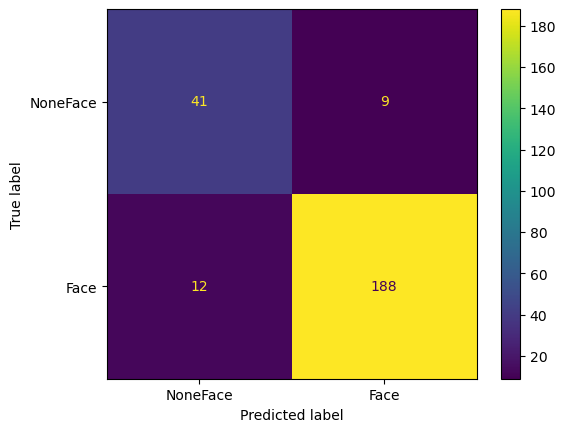

Accuracy for  3 NN =  0.964
Total number of samples: 250
Number of success cases: 241
Number of failure cases: 9 



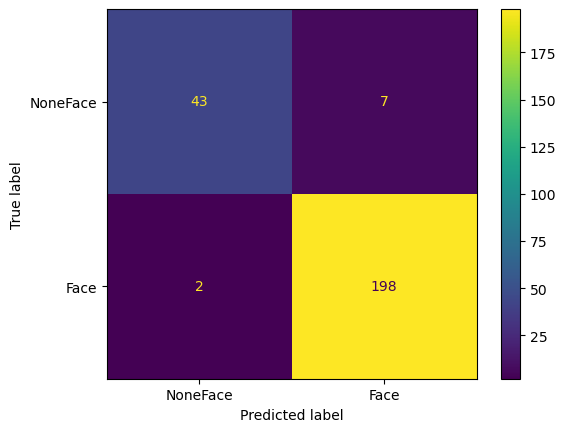

Accuracy for  5 NN =  0.94
Total number of samples: 250
Number of success cases: 235
Number of failure cases: 15 



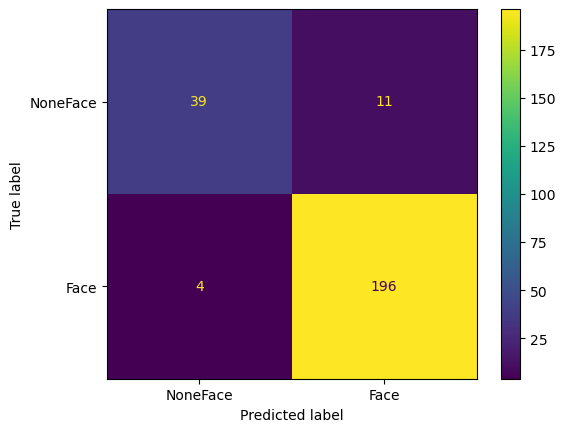

Accuracy for  7 NN =  0.956
Total number of samples: 250
Number of success cases: 239
Number of failure cases: 11 



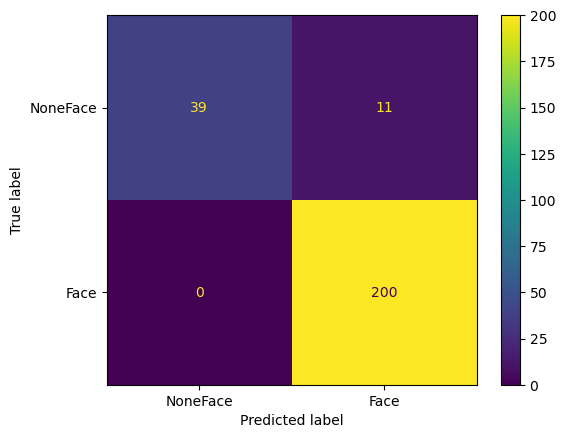

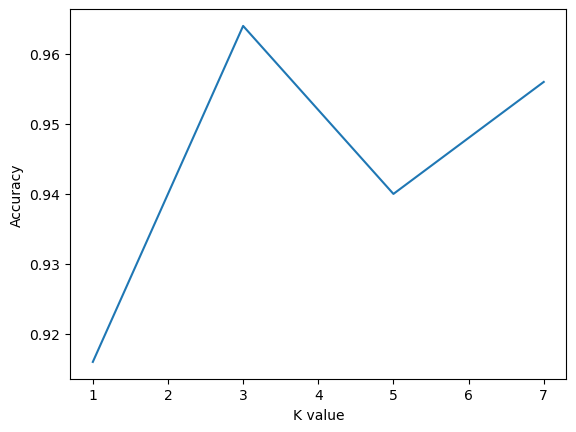

[0.916, 0.964, 0.94, 0.956]


Using 400 Face and 200 None face
Accuracy for  1 NN =  0.85
Total number of samples: 300
Number of success cases: 255
Number of failure cases: 45 



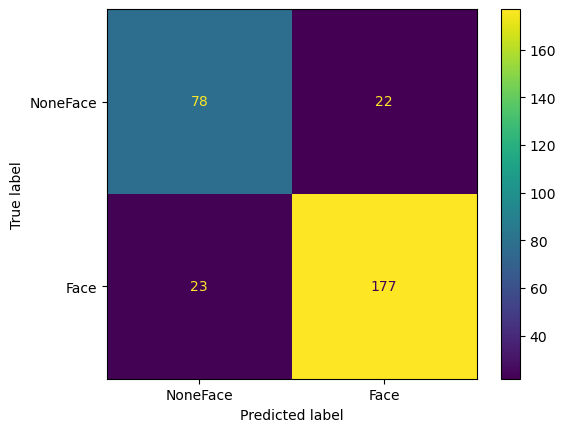

Accuracy for  3 NN =  0.8933333333333333
Total number of samples: 300
Number of success cases: 268
Number of failure cases: 32 



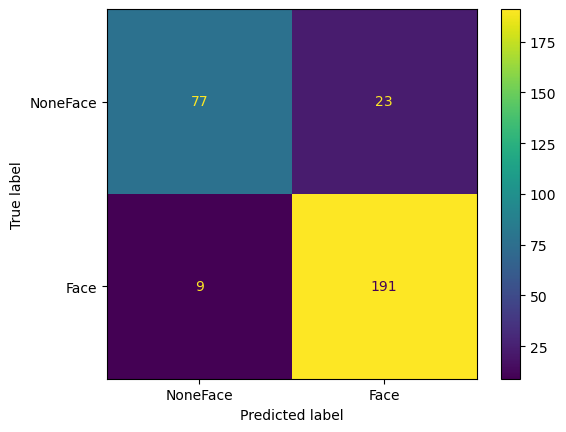

Accuracy for  5 NN =  0.91
Total number of samples: 300
Number of success cases: 273
Number of failure cases: 27 



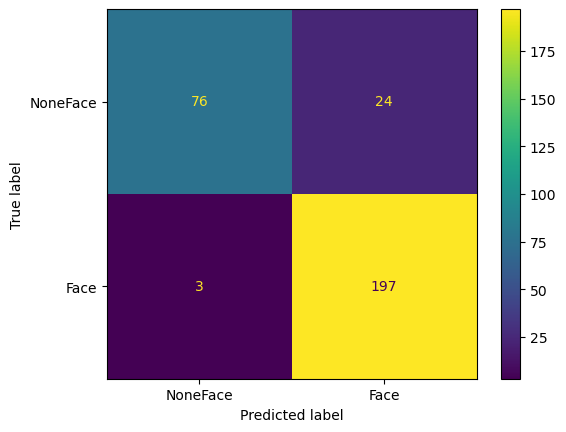

Accuracy for  7 NN =  0.9166666666666666
Total number of samples: 300
Number of success cases: 275
Number of failure cases: 25 



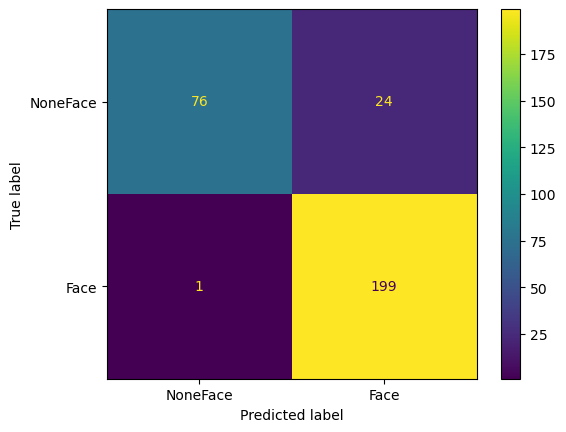

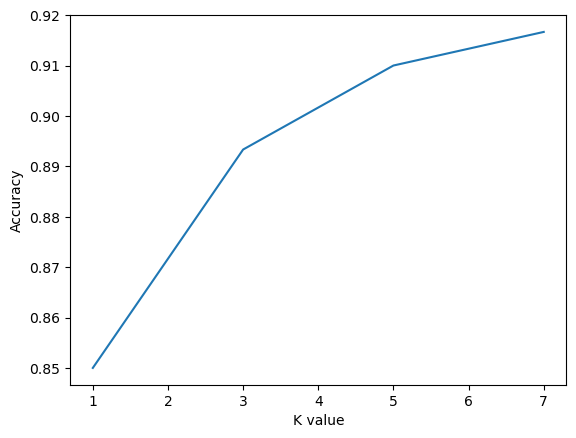

[0.85, 0.8933333333333333, 0.91, 0.9166666666666666]


Using 400 Face and 300 None face
Accuracy for  1 NN =  0.8314285714285714
Total number of samples: 350
Number of success cases: 291
Number of failure cases: 59 



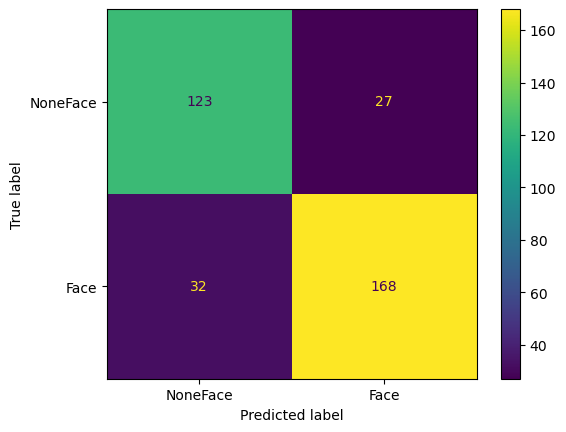

Accuracy for  3 NN =  0.8542857142857143
Total number of samples: 350
Number of success cases: 299
Number of failure cases: 51 



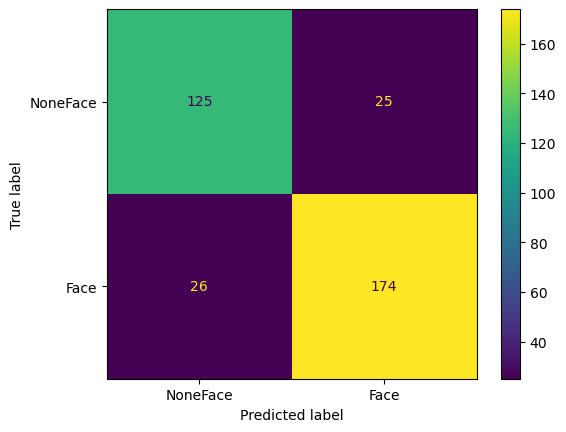

Accuracy for  5 NN =  0.8514285714285714
Total number of samples: 350
Number of success cases: 298
Number of failure cases: 52 



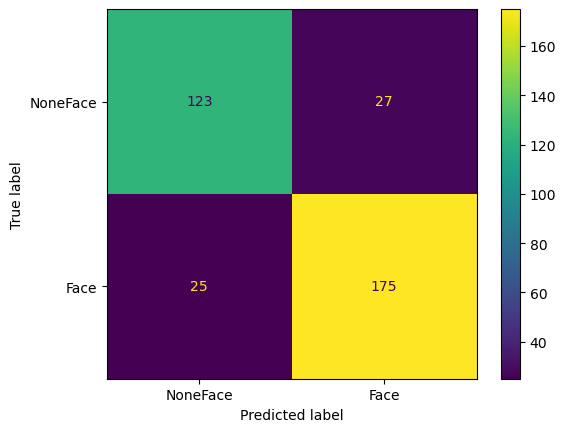

Accuracy for  7 NN =  0.8714285714285714
Total number of samples: 350
Number of success cases: 305
Number of failure cases: 45 



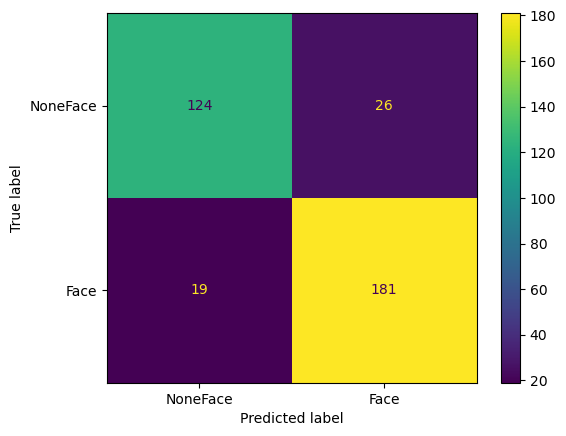

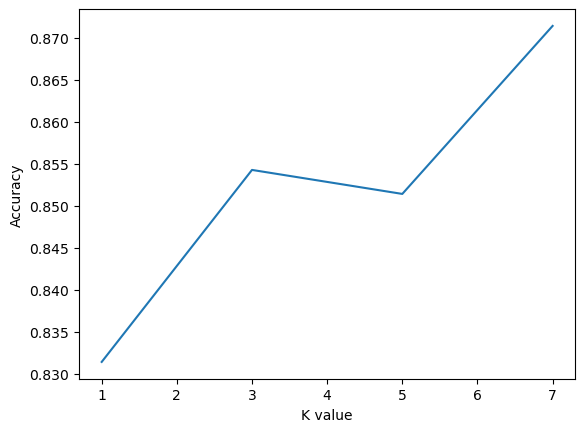

[0.8314285714285714, 0.8542857142857143, 0.8514285714285714, 0.8714285714285714]


Using 400 Face and 400 None face
Accuracy for  1 NN =  0.7575
Total number of samples: 400
Number of success cases: 303
Number of failure cases: 97 



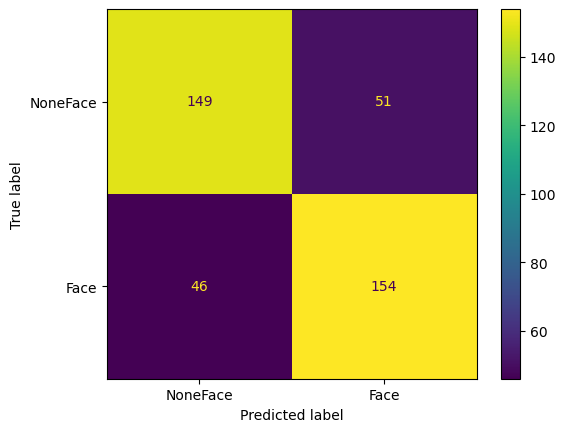

Accuracy for  3 NN =  0.815
Total number of samples: 400
Number of success cases: 326
Number of failure cases: 74 



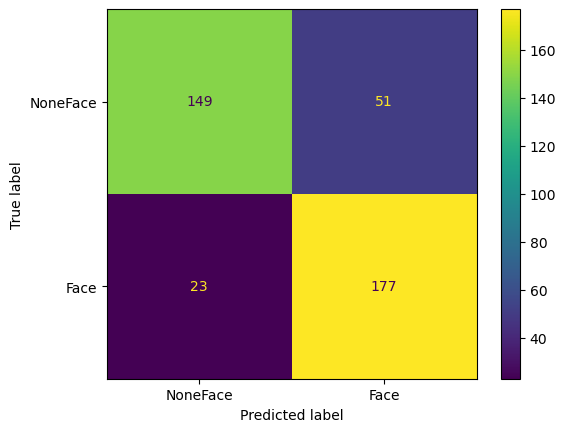

Accuracy for  5 NN =  0.825
Total number of samples: 400
Number of success cases: 330
Number of failure cases: 70 



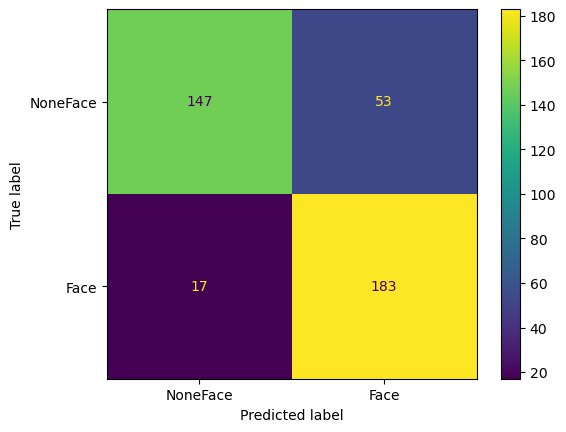

Accuracy for  7 NN =  0.8475
Total number of samples: 400
Number of success cases: 339
Number of failure cases: 61 



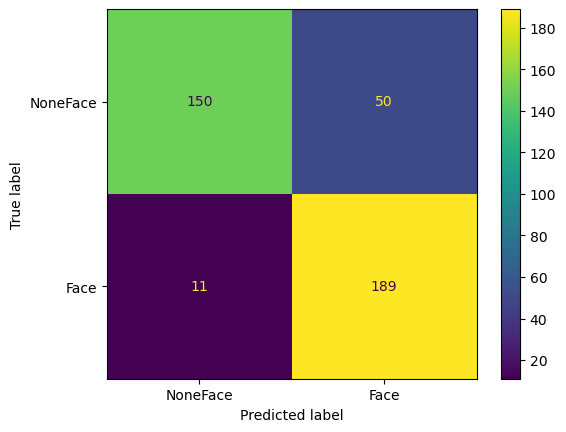

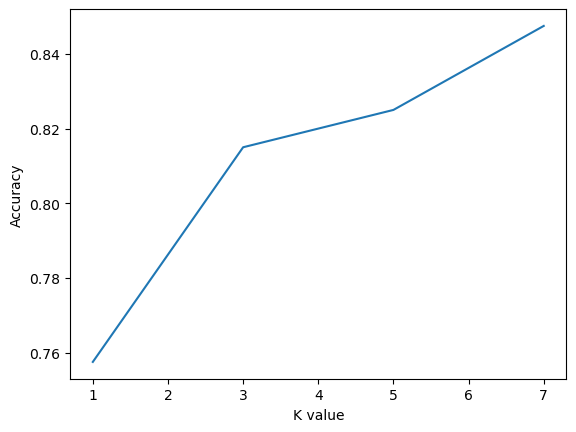

[0.7575, 0.815, 0.825, 0.8475]


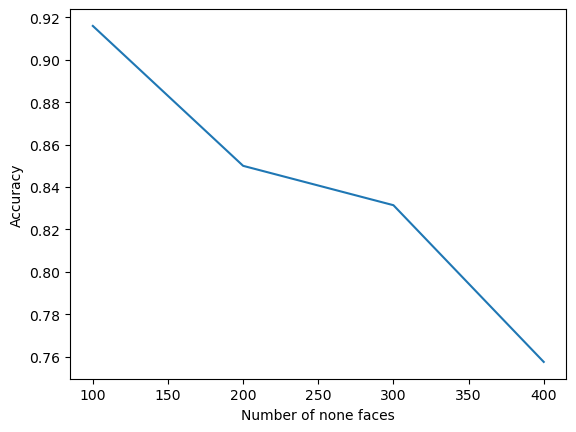

In [36]:
NumberNone = [100,200,300,400]
firstnn = []
for i in NumberNone:
    print("\n\nUsing 400 Face and",i,"None face")
    Xbin1_train, Xbin1_test, ybin1_train, ybin1_test = nonfacesplit(i,X,0.5)
    noneFaces = LDA(Xbin1_train, Xbin1_test, ybin1_train, ybin1_test)
    noneFaces.fitNon()
    k_nearest=[1,3,5,7]
    scores=[]
    for k in k_nearest:
        accuracy = noneFaces.project(1,k,1)
        if k==1:
            firstnn.append(accuracy)
        scores.append(accuracy)
    plt.xlabel("K value")
    plt.ylabel("Accuracy")
    plt.plot(k_nearest,scores)
    plt.show()
    print(scores)
plt.xlabel("Number of none faces")
plt.ylabel("Accuracy")
plt.plot(NumberNone,firstnn)
plt.show()



Using 400 Face and 500 None face
Accuracy for  1 NN =  0.7933333333333333
Total number of samples: 450
Number of success cases: 357
Number of failure cases: 93 



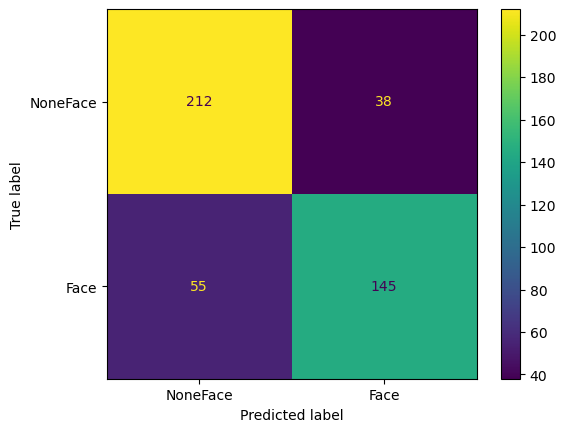

Accuracy for  3 NN =  0.8288888888888889
Total number of samples: 450
Number of success cases: 373
Number of failure cases: 77 



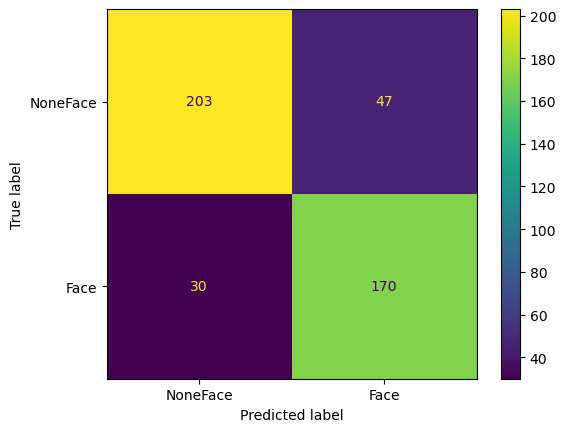

Accuracy for  5 NN =  0.8333333333333334
Total number of samples: 450
Number of success cases: 375
Number of failure cases: 75 



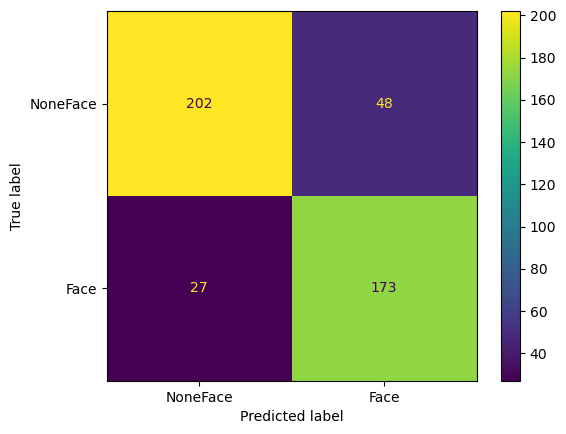

Accuracy for  7 NN =  0.8333333333333334
Total number of samples: 450
Number of success cases: 375
Number of failure cases: 75 



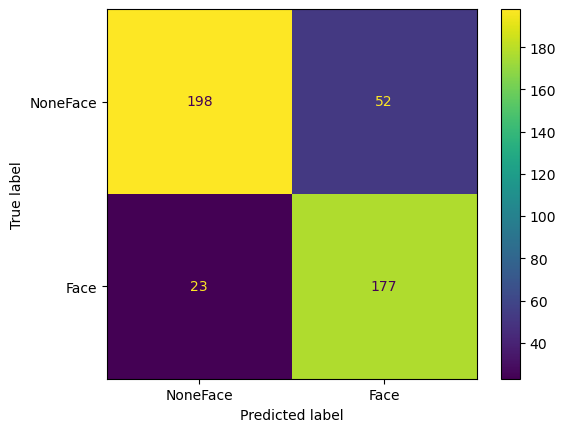

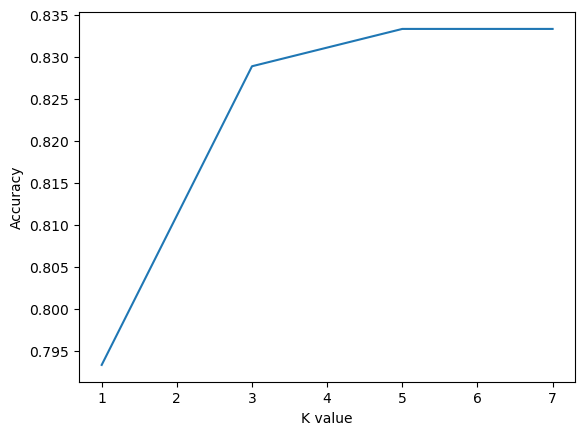

[0.7933333333333333, 0.8288888888888889, 0.8333333333333334, 0.8333333333333334]


Using 400 Face and 600 None face
Accuracy for  1 NN =  0.792
Total number of samples: 500
Number of success cases: 396
Number of failure cases: 104 



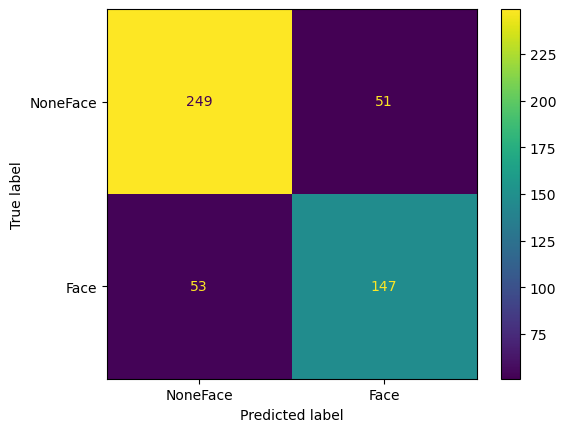

Accuracy for  3 NN =  0.816
Total number of samples: 500
Number of success cases: 408
Number of failure cases: 92 



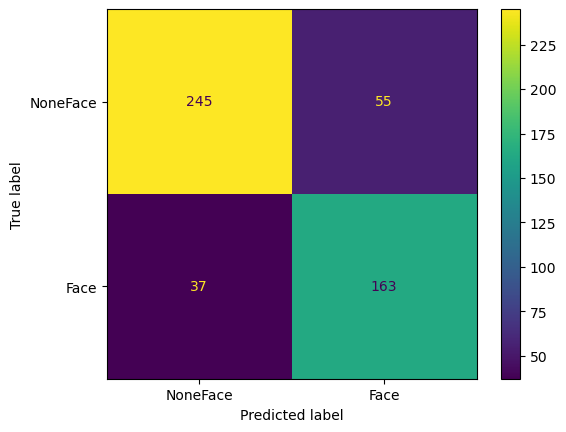

Accuracy for  5 NN =  0.812
Total number of samples: 500
Number of success cases: 406
Number of failure cases: 94 



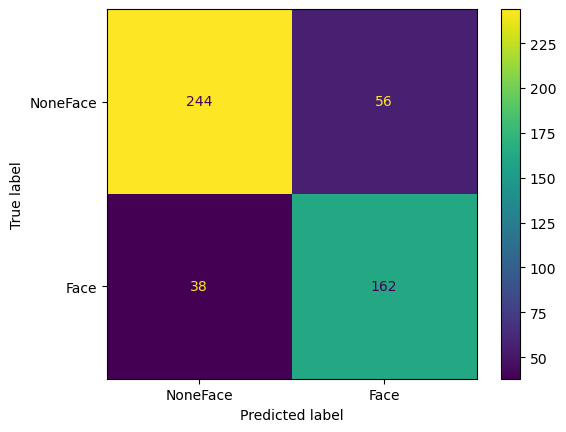

Accuracy for  7 NN =  0.808
Total number of samples: 500
Number of success cases: 404
Number of failure cases: 96 



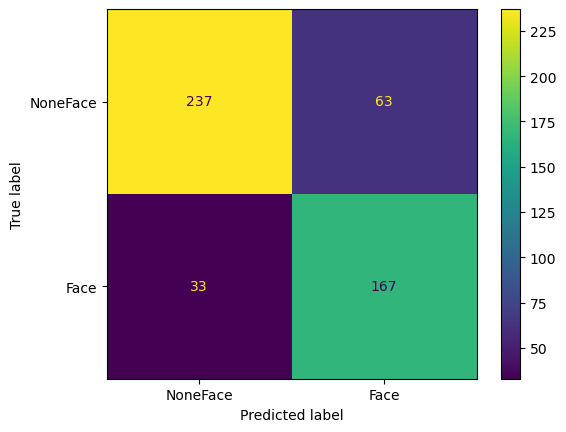

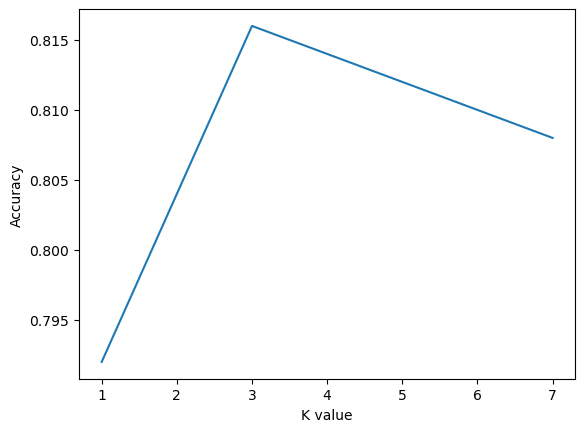

[0.792, 0.816, 0.812, 0.808]


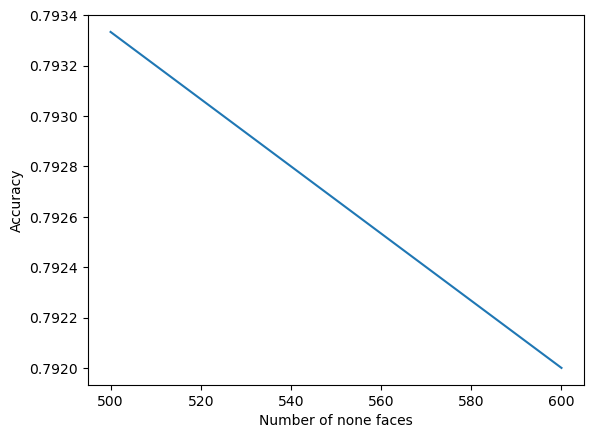

In [37]:
NumberNone = [500,600]
firstnn = []
for i in NumberNone:
    print("\n\nUsing 400 Face and",i,"None face")
    Xbin_train, Xbin_test, ybin_train, ybin_test = nonfacesplit(i,X,0.5)
    noneFaces = LDA(Xbin_train, Xbin_test, ybin_train, ybin_test)
    noneFaces.fitNon()
    k_nearest=[1,3,5,7]
    scores=[]
    for k in k_nearest:
        accuracy = noneFaces.project(1,k,1)
        if k==1:
            firstnn.append(accuracy)
        scores.append(accuracy)
    plt.xlabel("K value")
    plt.ylabel("Accuracy")
    plt.plot(k_nearest,scores)
    plt.show()
    print(scores)
plt.xlabel("Number of none faces")
plt.ylabel("Accuracy")
plt.plot(NumberNone,firstnn)
plt.show()

# Bonus 70% 30% split for LDA

In [38]:
Bonus_Xtrain, Bonus_Xtest, Bonus_Ytrain, Bonus_Ytest = train_test_split(X, y, test_size=0.3,stratify=y,random_state = 42)
bonus = LDA(Bonus_Xtrain, Bonus_Xtest, Bonus_Ytrain, Bonus_Ytest)

In [39]:
s = bonus.fitNaive()

Accuracy for  1 NN =  0.975
Accuracy for  3 NN =  0.925
Accuracy for  5 NN =  0.9
Accuracy for  7 NN =  0.8833333333333333
[0.975, 0.925, 0.9, 0.8833333333333333]


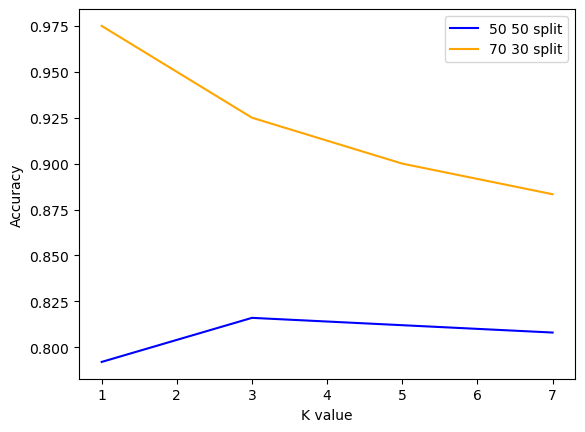

In [40]:
k_nearest = [1,3,5,7]
scoresbonus=[]
for k in k_nearest:   
    score = bonus.project(39,k,0)
    scoresbonus.append(score)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores,color="blue",label="50 50 split")
plt.plot(k_nearest,scoresbonus,color="orange",label="70 30 split")
plt.legend(loc="upper right")
print(scoresbonus)

0.600482702255249 Seconds
0.965
0.95
0.955
0.96


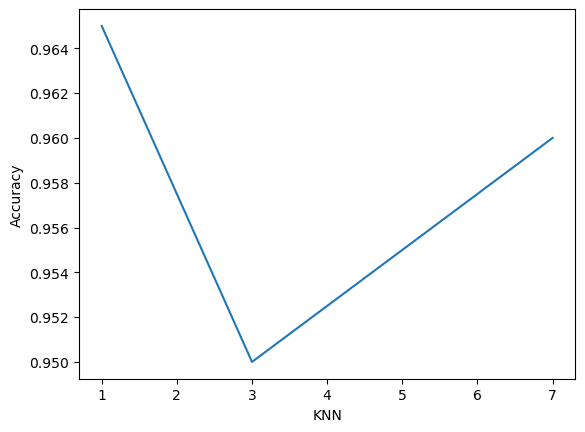

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDAsk
start = time.time()
lda = LDAsk()
# lda.fit(x_train, y_train.ravel())
# lda.transform(x_train).shape
X_train = lda.fit_transform(x_train, y_train.ravel())
X_test = lda.transform(x_test)
end = time.time()
print(end-start,"Seconds")
X_test.shape
knn = [1,3,5,7]
bonscore = []
for k in knn:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train.ravel())
    preds=neigh.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    print(accuracy)
    bonscore.append(accuracy)
plt.xlabel("KNN")
plt.ylabel("Accuracy")
plt.plot(knn,bonscore)
plt.show()

In [46]:
def LDAnone(data,label):
    df = pd.DataFrame(data)
    df['label']=label
    means = np.array(df.groupby('label').mean())
#   temp = means[0] - means[1]
#    B = temp[np.newaxis].T @ temp[np.newaxis]
    overallmean = np.mean(data,axis=0)
    temp1 = means[0] - overallmean
    temp2 = means[1] - overallmean
    Sb = np.zeros((10304,10304))
    Sb = Sb + 5*(temp1[np.newaxis].T @ temp1[np.newaxis])
    Sb = Sb + 5*(temp2[np.newaxis].T @ temp2[np.newaxis])
    Z1 = np.array(df[df['label']==0].drop(['label'],axis=1) - means[0])
    Z2 = np.array(df[df['label']==1].drop(['label'],axis=1) - means[1])
    S1 = Z1.T @ Z1
    S2 = Z2.T @ Z2
    S = S1 + S2
    Sinv = np.linalg.inv(S)
    Final = Sinv @ Sb
    eigvalues,eigvectors = np.linalg.eigh(Final)
    idx2 = eigvalues.argsort()[::-1]
    eigvectors=eigvectors[:,idx2]
    return eigvectors

In [43]:
Xbin_train, Xbin_test, ybin_train, ybin_test = nonfacesplit(100,X,0.5)
# noneFaces = LDA(Xbin_train, Xbin_test, ybin_train, ybin_test)

In [44]:
Xbin_train.shape

(250, 10304)

In [47]:
so = LDAnone(Xbin_train,ybin_train)

In [48]:
print("400 face and 100 none face 50% split")
for i in range(1,300):
    U_LDA = so[:,0:i]
    projectedtrain = Xbin_train @ U_LDA
    projectedtest = Xbin_test @ U_LDA
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(projectedtrain, ybin_train.ravel())
    preds=neigh.predict(projectedtest)
    accuracy = accuracy_score(ybin_test, preds)
    print("Accuracy for ",i , "vector = ",accuracy)

400 face and 100 none face 50% split
Accuracy for  1 vector =  0.916
Accuracy for  2 vector =  0.936
Accuracy for  3 vector =  0.916
Accuracy for  4 vector =  0.928
Accuracy for  5 vector =  0.94
Accuracy for  6 vector =  0.936
Accuracy for  7 vector =  0.936
Accuracy for  8 vector =  0.936
Accuracy for  9 vector =  0.936
Accuracy for  10 vector =  0.936
Accuracy for  11 vector =  0.936
Accuracy for  12 vector =  0.936
Accuracy for  13 vector =  0.932
Accuracy for  14 vector =  0.936
Accuracy for  15 vector =  0.936
Accuracy for  16 vector =  0.944
Accuracy for  17 vector =  0.948
Accuracy for  18 vector =  0.948
Accuracy for  19 vector =  0.948
Accuracy for  20 vector =  0.944
Accuracy for  21 vector =  0.944
Accuracy for  22 vector =  0.944
Accuracy for  23 vector =  0.948
Accuracy for  24 vector =  0.94
Accuracy for  25 vector =  0.944
Accuracy for  26 vector =  0.944
Accuracy for  27 vector =  0.956
Accuracy for  28 vector =  0.956
Accuracy for  29 vector =  0.952
Accuracy for  30 

In [49]:
print("400 face and 400 none face 50% split")
for i in range(1,300):
    U_LDA = so[:,0:i]
    projectedtrain = Xbin_train @ U_LDA
    projectedtest = Xbin_test @ U_LDA
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(projectedtrain, ybin_train.ravel())
    preds=neigh.predict(projectedtest)
    accuracy = accuracy_score(ybin_test, preds)
    print("Accuracy for ",i , "vector = ",accuracy)

400 face and 400 none face 50% split
Accuracy for  1 vector =  0.916
Accuracy for  2 vector =  0.936
Accuracy for  3 vector =  0.916
Accuracy for  4 vector =  0.928
Accuracy for  5 vector =  0.94
Accuracy for  6 vector =  0.936
Accuracy for  7 vector =  0.936
Accuracy for  8 vector =  0.936
Accuracy for  9 vector =  0.936
Accuracy for  10 vector =  0.936
Accuracy for  11 vector =  0.936
Accuracy for  12 vector =  0.936
Accuracy for  13 vector =  0.932
Accuracy for  14 vector =  0.936
Accuracy for  15 vector =  0.936
Accuracy for  16 vector =  0.944
Accuracy for  17 vector =  0.948
Accuracy for  18 vector =  0.948
Accuracy for  19 vector =  0.948
Accuracy for  20 vector =  0.944
Accuracy for  21 vector =  0.944
Accuracy for  22 vector =  0.944
Accuracy for  23 vector =  0.948
Accuracy for  24 vector =  0.94
Accuracy for  25 vector =  0.944
Accuracy for  26 vector =  0.944
Accuracy for  27 vector =  0.956
Accuracy for  28 vector =  0.956
Accuracy for  29 vector =  0.952
Accuracy for  30 

In [50]:
print("400 face and 400 none face 50% split")
for i in range(1,300):
    U_LDA = so[:,0:i]
    projectedtrain = Xbin_train @ U_LDA
    projectedtest = Xbin_test @ U_LDA
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(projectedtrain, ybin_train.ravel())
    preds=neigh.predict(projectedtest)
    accuracy = accuracy_score(ybin_test, preds)
    print("Accuracy for ",i , "vector = ",accuracy)

400 face and 400 none face 50% split
Accuracy for  1 vector =  0.916
Accuracy for  2 vector =  0.936
Accuracy for  3 vector =  0.916
Accuracy for  4 vector =  0.928
Accuracy for  5 vector =  0.94
Accuracy for  6 vector =  0.936
Accuracy for  7 vector =  0.936
Accuracy for  8 vector =  0.936
Accuracy for  9 vector =  0.936
Accuracy for  10 vector =  0.936
Accuracy for  11 vector =  0.936
Accuracy for  12 vector =  0.936
Accuracy for  13 vector =  0.932
Accuracy for  14 vector =  0.936
Accuracy for  15 vector =  0.936
Accuracy for  16 vector =  0.944
Accuracy for  17 vector =  0.948
Accuracy for  18 vector =  0.948
Accuracy for  19 vector =  0.948
Accuracy for  20 vector =  0.944
Accuracy for  21 vector =  0.944
Accuracy for  22 vector =  0.944
Accuracy for  23 vector =  0.948
Accuracy for  24 vector =  0.94
Accuracy for  25 vector =  0.944
Accuracy for  26 vector =  0.944
Accuracy for  27 vector =  0.956
Accuracy for  28 vector =  0.956
Accuracy for  29 vector =  0.952
Accuracy for  30 

In [51]:
print("400 face and 100 none face 70% split")
for i in range(1,300):
    U_LDA = so[:,0:i]
    projectedtrain = Xbin_train @ U_LDA
    projectedtest = Xbin_test @ U_LDA
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(projectedtrain, ybin_train.ravel())
    preds=neigh.predict(projectedtest)
    accuracy = accuracy_score(ybin_test, preds)
    print("Accuracy for ",i , "vector = ",accuracy)

400 face and 100 none face 70% split
Accuracy for  1 vector =  0.916
Accuracy for  2 vector =  0.936
Accuracy for  3 vector =  0.916
Accuracy for  4 vector =  0.928
Accuracy for  5 vector =  0.94
Accuracy for  6 vector =  0.936
Accuracy for  7 vector =  0.936
Accuracy for  8 vector =  0.936
Accuracy for  9 vector =  0.936
Accuracy for  10 vector =  0.936
Accuracy for  11 vector =  0.936
Accuracy for  12 vector =  0.936
Accuracy for  13 vector =  0.932
Accuracy for  14 vector =  0.936
Accuracy for  15 vector =  0.936
Accuracy for  16 vector =  0.944
Accuracy for  17 vector =  0.948
Accuracy for  18 vector =  0.948
Accuracy for  19 vector =  0.948
Accuracy for  20 vector =  0.944
Accuracy for  21 vector =  0.944
Accuracy for  22 vector =  0.944
Accuracy for  23 vector =  0.948
Accuracy for  24 vector =  0.94
Accuracy for  25 vector =  0.944
Accuracy for  26 vector =  0.944
Accuracy for  27 vector =  0.956
Accuracy for  28 vector =  0.956
Accuracy for  29 vector =  0.952
Accuracy for  30 



Using 400 Face and 100 None face
Accuracy for  1 NN =  0.9333333333333333
Total number of samples: 150
Number of success cases: 140
Number of failure cases: 10 



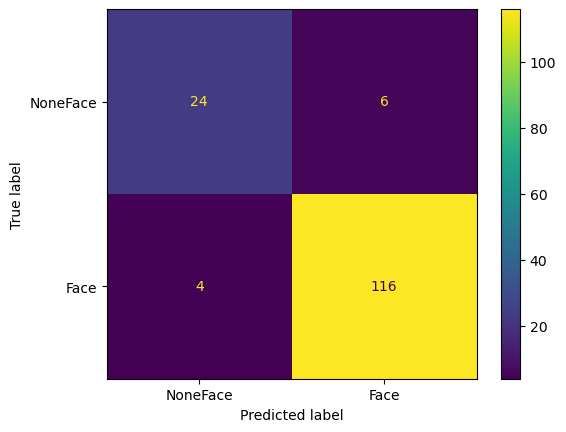

Accuracy for  3 NN =  0.9533333333333334
Total number of samples: 150
Number of success cases: 143
Number of failure cases: 7 



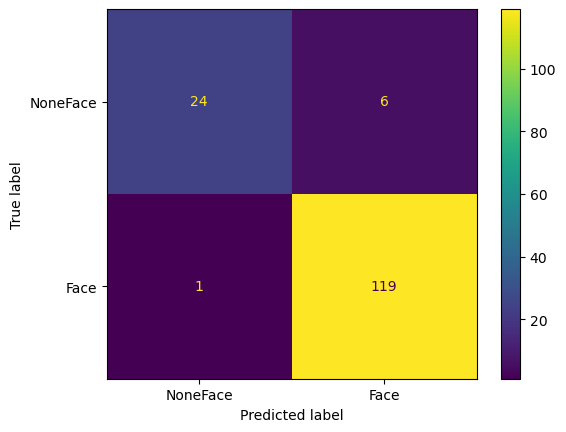

Accuracy for  5 NN =  0.94
Total number of samples: 150
Number of success cases: 141
Number of failure cases: 9 



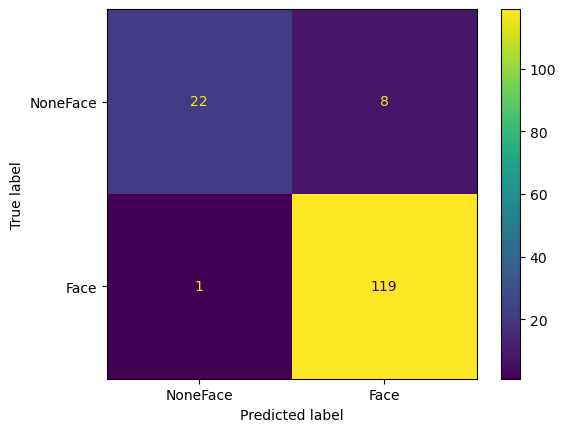

Accuracy for  7 NN =  0.9466666666666667
Total number of samples: 150
Number of success cases: 142
Number of failure cases: 8 



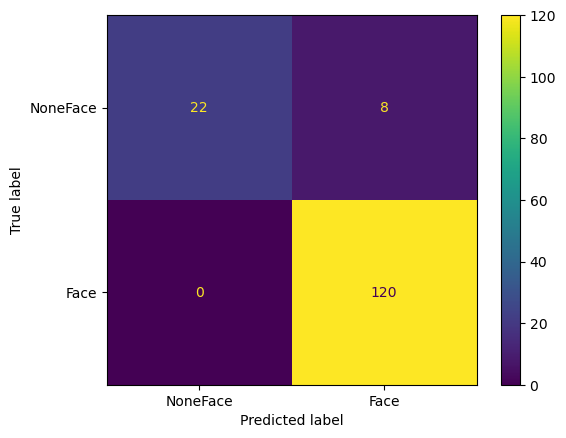

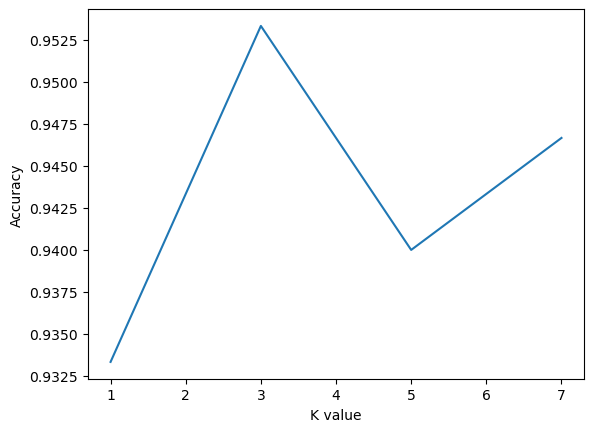

[0.9333333333333333, 0.9533333333333334, 0.94, 0.9466666666666667]


Using 400 Face and 200 None face
Accuracy for  1 NN =  0.8111111111111111
Total number of samples: 180
Number of success cases: 146
Number of failure cases: 34 



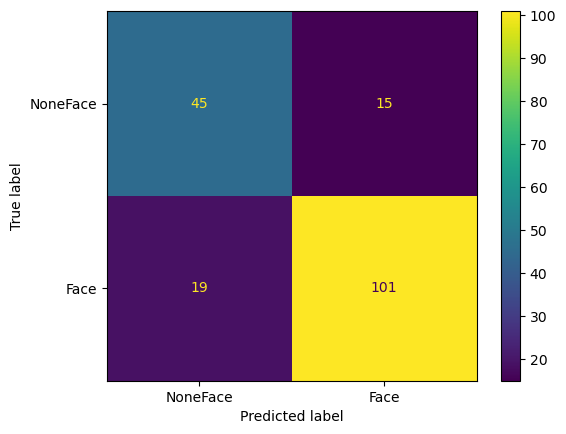

Accuracy for  3 NN =  0.85
Total number of samples: 180
Number of success cases: 153
Number of failure cases: 27 



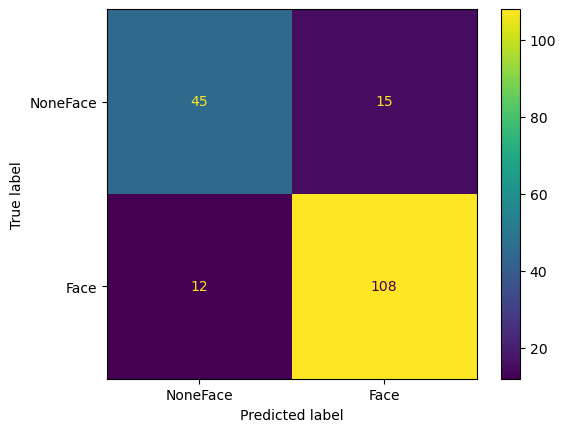

Accuracy for  5 NN =  0.8888888888888888
Total number of samples: 180
Number of success cases: 160
Number of failure cases: 20 



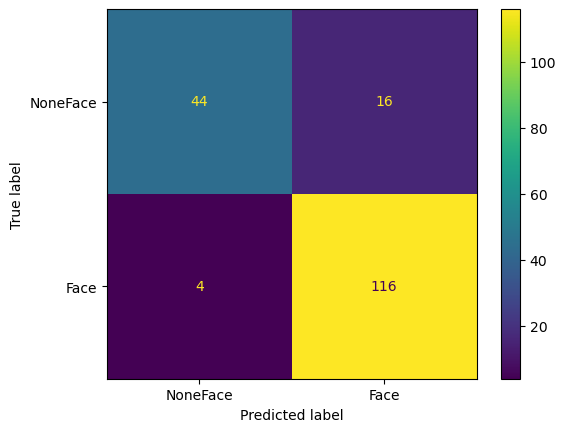

Accuracy for  7 NN =  0.9055555555555556
Total number of samples: 180
Number of success cases: 163
Number of failure cases: 17 



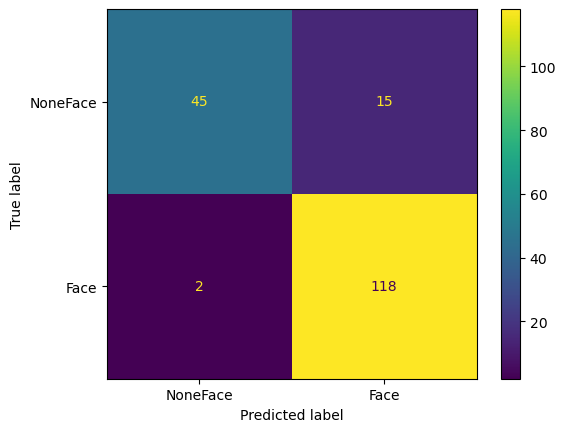

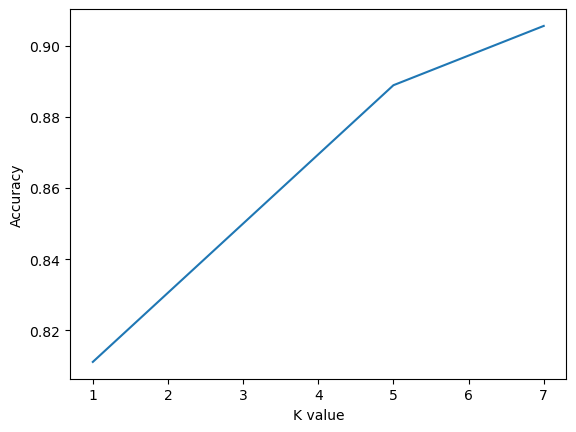

[0.8111111111111111, 0.85, 0.8888888888888888, 0.9055555555555556]


Using 400 Face and 300 None face
Accuracy for  1 NN =  0.8047619047619048
Total number of samples: 210
Number of success cases: 169
Number of failure cases: 41 



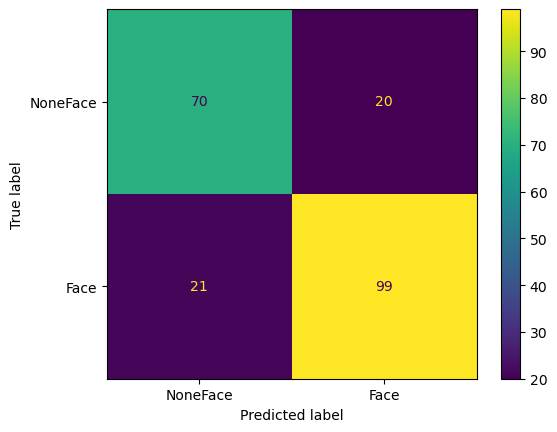

Accuracy for  3 NN =  0.8428571428571429
Total number of samples: 210
Number of success cases: 177
Number of failure cases: 33 



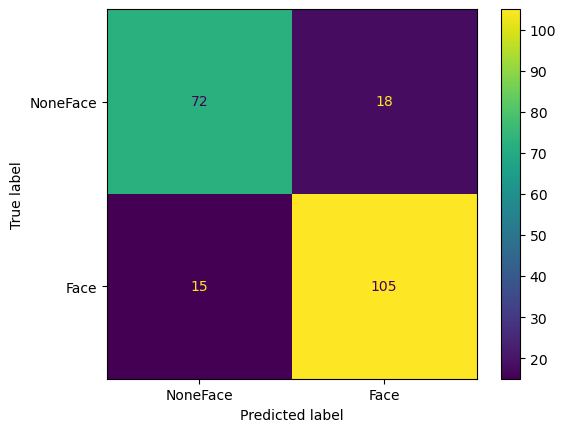

Accuracy for  5 NN =  0.8333333333333334
Total number of samples: 210
Number of success cases: 175
Number of failure cases: 35 



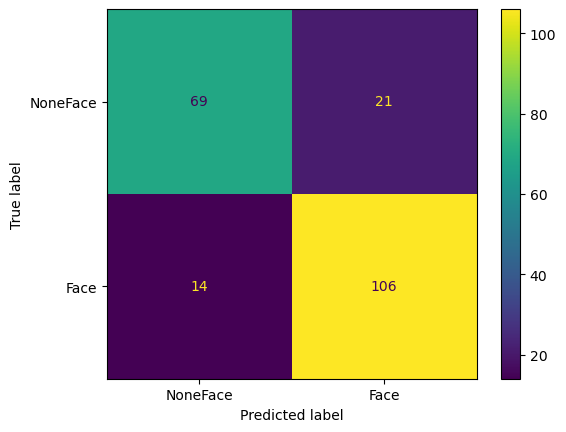

Accuracy for  7 NN =  0.8428571428571429
Total number of samples: 210
Number of success cases: 177
Number of failure cases: 33 



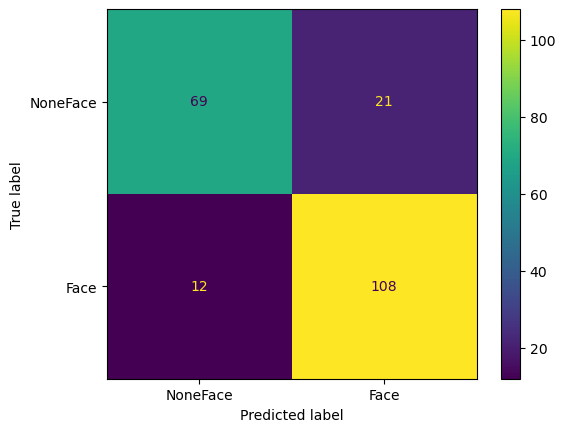

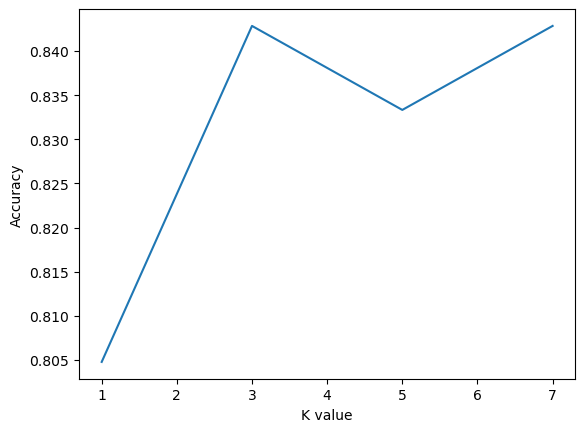

[0.8047619047619048, 0.8428571428571429, 0.8333333333333334, 0.8428571428571429]


Using 400 Face and 400 None face
Accuracy for  1 NN =  0.7791666666666667
Total number of samples: 240
Number of success cases: 187
Number of failure cases: 53 



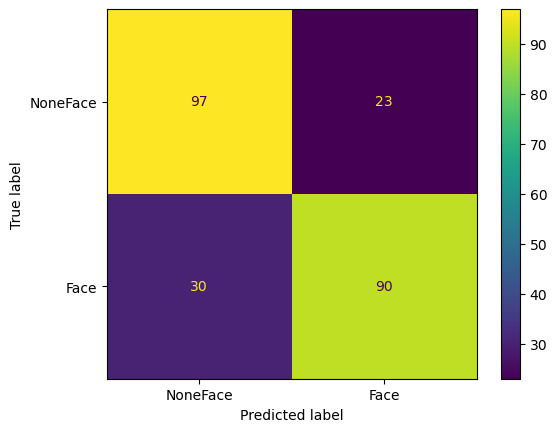

Accuracy for  3 NN =  0.8291666666666667
Total number of samples: 240
Number of success cases: 199
Number of failure cases: 41 



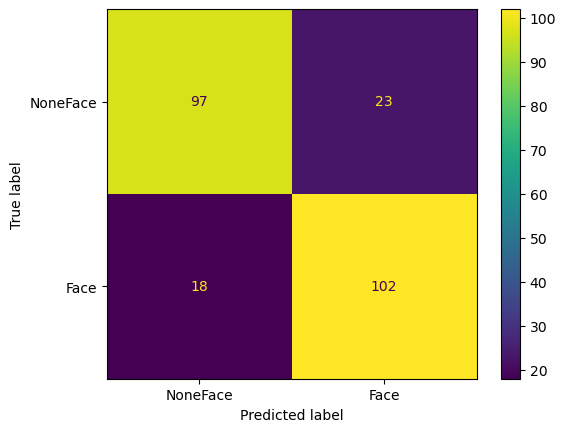

Accuracy for  5 NN =  0.8416666666666667
Total number of samples: 240
Number of success cases: 202
Number of failure cases: 38 



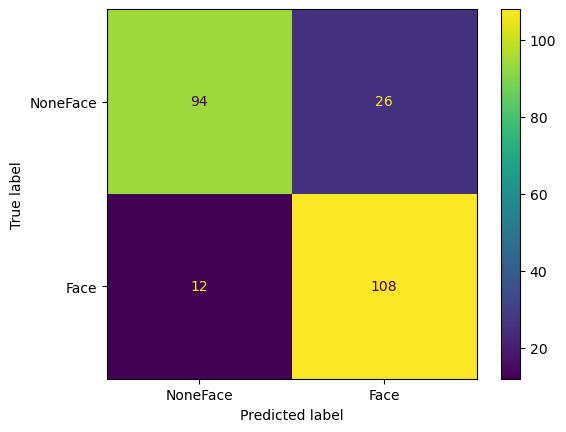

Accuracy for  7 NN =  0.8541666666666666
Total number of samples: 240
Number of success cases: 205
Number of failure cases: 35 



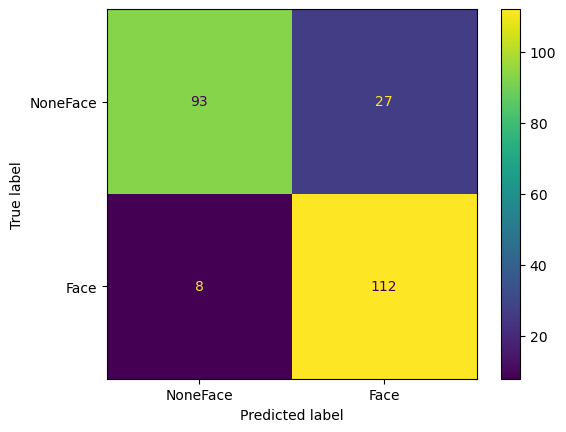

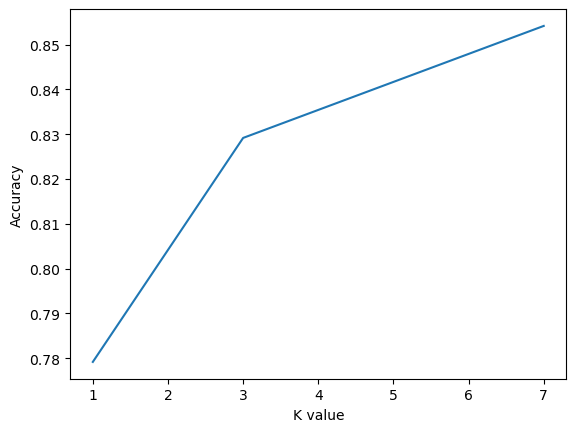

[0.7791666666666667, 0.8291666666666667, 0.8416666666666667, 0.8541666666666666]


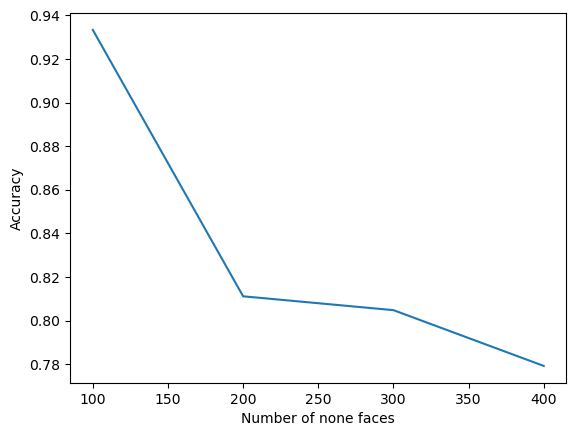

[0.9333333333333333, 0.8111111111111111, 0.8047619047619048, 0.7791666666666667]


In [52]:
NumberNone = [100,200,300,400]
firstnn = []
for i in NumberNone:
    print("\n\nUsing 400 Face and",i,"None face")
    Xbin1_train, Xbin1_test, ybin1_train, ybin1_test = nonfacesplit(i,X,0.3)
    noneFaces = LDA(Xbin1_train, Xbin1_test, ybin1_train, ybin1_test)
    noneFaces.fitNon()
    k_nearest=[1,3,5,7]
    scores=[]
    for k in k_nearest:
        accuracy = noneFaces.project(1,k,1)
        if k==1:
            firstnn.append(accuracy)
        scores.append(accuracy)
    plt.xlabel("K value")
    plt.ylabel("Accuracy")
    plt.plot(k_nearest,scores)
    plt.show()
    print(scores)
plt.xlabel("Number of none faces")
plt.ylabel("Accuracy")
plt.plot(NumberNone,firstnn)
plt.show()
print(firstnn)

Fixing the number of face images vs diff number of non faces images
(in training)
* 100 non-faces vs 200 faces
* 150 non-faces vs 400 faces
* 200 non-faces vs 400 faces
* 340 non-faces vs 400 faces (already done above)

In [85]:
noOfNonFaces=[100,150,200,340]
scores8=[]
scores85=[]
scores9=[]
scores95=[]

In [86]:
adidas = importResizeImages('/kaggle/input/nike-adidas-and-converse-imaged/train/adidas',50)
furniture = importResizeImages('/kaggle/input/furniture-images-dataset/furniture_images/furniture_images',50)
coca =importResizeImages('/kaggle/input/pepsi-and-cocacola-images/train/cocacola',50)
pepsi = importResizeImages('/kaggle/input/pepsi-and-cocacola-images/train/pepsi',50)

nonfaces = np.concatenate((adidas, furniture, coca, pepsi), axis=0)

bin_data=np.concatenate((X,nonfaces))

bin_labels=np.concatenate((np.ones((400,1)),np.zeros((200,1))))

from sklearn.model_selection import train_test_split
Xbin_train, Xbin_test, ybin_train, ybin_test = train_test_split(bin_data, bin_labels,
                                                    stratify=bin_labels, 
                                                    test_size=0.5)

print(f'faces vs non-faces in training {np.unique(ybin_train,return_counts=True)}')
print(f'faces vs non-faces in testing {np.unique(ybin_test,return_counts=True)}')

faces vs non-faces in training (array([0., 1.]), array([100, 200]))
faces vs non-faces in testing (array([0., 1.]), array([100, 200]))


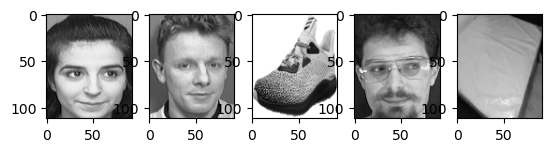

In [87]:
show_images(Xbin_train,5)

In [88]:
pca_8bin=PCA(0.8)
eigvectors_8bin=pca_8bin.fit(Xbin_train)
x_train_reduced8bin=pca_8bin.project(Xbin_train)
x_test_reduced8bin=pca_8bin.project(Xbin_test)
neigh8bin = KNeighborsClassifier(n_neighbors=1)
neigh8bin.fit(x_train_reduced8bin, ybin_train.ravel())
preds8bin=neigh8bin.predict(x_test_reduced8bin)

pca_9bin=PCA(0.9)
eigvectors_9bin=pca_9bin.fit(Xbin_train)
x_train_reduced9bin=pca_9bin.project(Xbin_train)
x_test_reduced9bin=pca_9bin.project(Xbin_test)
neigh9bin = KNeighborsClassifier(n_neighbors=1)
neigh9bin.fit(x_train_reduced9bin, ybin_train.ravel())
preds9bin=neigh9bin.predict(x_test_reduced9bin)


pca_95bin=PCA(0.95)
eigvectors_95bin=pca_95bin.fit(Xbin_train)
x_train_reduced95bin=pca_95bin.project(Xbin_train)
x_test_reduced95bin=pca_95bin.project(Xbin_test)
neigh95bin = KNeighborsClassifier(n_neighbors=1)
neigh95bin.fit(x_train_reduced95bin, ybin_train.ravel())
preds95bin=neigh95bin.predict(x_test_reduced95bin)


pca_85bin=PCA(0.85)
eigvectors_85bin=pca_85bin.fit(Xbin_train)
x_train_reduced85bin=pca_85bin.project(Xbin_train)
x_test_reduced85bin=pca_85bin.project(Xbin_test)
neigh85bin = KNeighborsClassifier(n_neighbors=1)
neigh85bin.fit(x_train_reduced85bin, ybin_train.ravel())
preds85bin=neigh85bin.predict(x_test_reduced85bin)

for alpha = 0.8 , the number of important eighvectors are = 16
for alpha = 0.9 , the number of important eighvectors are = 49
for alpha = 0.95 , the number of important eighvectors are = 97
for alpha = 0.85 , the number of important eighvectors are = 28


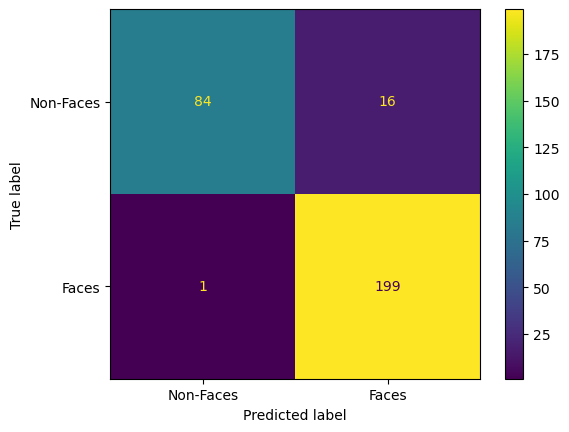

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion = confusion_matrix(ybin_test, preds8bin)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Non-Faces', 'Faces'])
cm_display.plot()
plt.show()

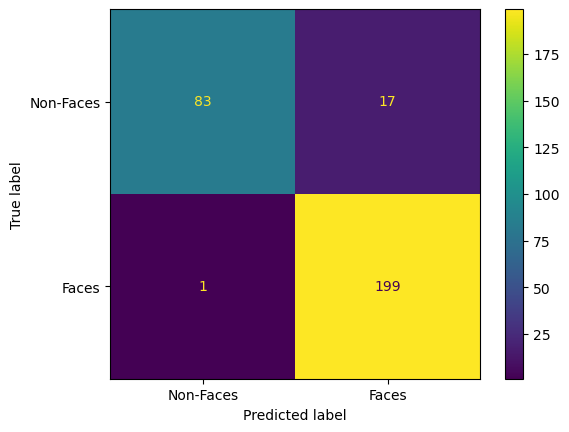

In [90]:
confusion = confusion_matrix(ybin_test, preds85bin)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Non-Faces', 'Faces'])
cm_display.plot()
plt.show()

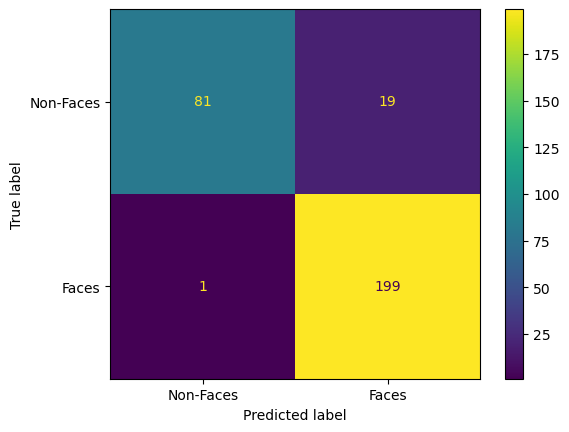

In [91]:
confusion = confusion_matrix(ybin_test, preds9bin)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Non-Faces', 'Faces'])
cm_display.plot()
plt.show()

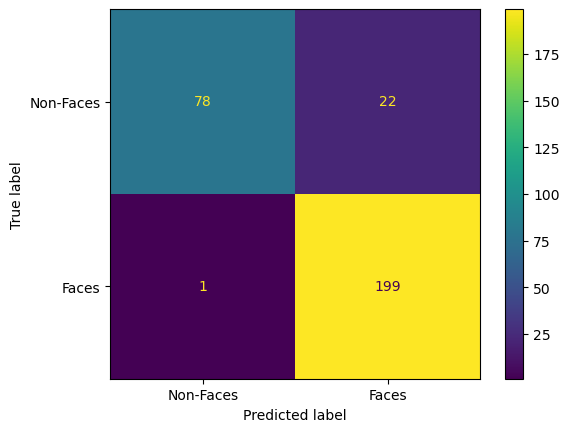

In [92]:
confusion = confusion_matrix(ybin_test, preds95bin)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Non-Faces', 'Faces'])
cm_display.plot()
plt.show()

In [93]:
print('100 non-faces vs 200 faces')
print(f'accuracy for alpha=0.95   is {accuracy_score(ybin_test, preds95bin)}')
print(f'accuracy for alpha=0.9  is {accuracy_score(ybin_test, preds9bin)}')
print(f'accuracy for alpha=0.85  is {accuracy_score(ybin_test, preds85bin)}')
print(f'accuracy for alpha=0.8  is {accuracy_score(ybin_test, preds8bin)}')

100 non-faces vs 200 faces
accuracy for alpha=0.95   is 0.9233333333333333
accuracy for alpha=0.9  is 0.9333333333333333
accuracy for alpha=0.85  is 0.94
accuracy for alpha=0.8  is 0.9433333333333334


[0.9433333333333334, 0.9366666666666666, 0.9166666666666666, 0.9166666666666666]
[0.94, 0.9166666666666666, 0.9033333333333333, 0.8933333333333333]
[0.9333333333333333, 0.9166666666666666, 0.9033333333333333, 0.8966666666666666]
[0.9233333333333333, 0.9, 0.89, 0.89]


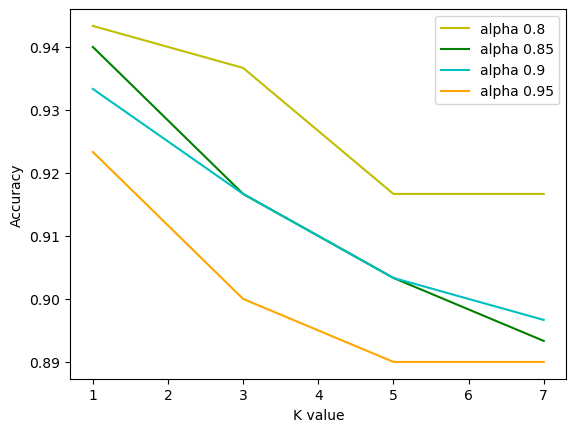

In [94]:
k_nearest=[1,3,5,7]
scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced8bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced8bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'y', label ='alpha 0.8')

scores8.append(np.array(scores))
print(scores)



scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced85bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced85bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'g', label ='alpha 0.85')

scores85.append(np.array(scores))


print(scores)


scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced9bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced9bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'c', label ='alpha 0.9')

scores9.append(np.array(scores))

print(scores)


scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced95bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced95bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'orange', label ='alpha 0.95')

scores95.append(np.array(scores))

print(scores)

plt.legend(loc="upper right")
plt.show()


* 150 non-faces vs 200 faces

In [95]:
adidas = importResizeImages('/kaggle/input/nike-adidas-and-converse-imaged/train/adidas',75)
furniture = importResizeImages('/kaggle/input/furniture-images-dataset/furniture_images/furniture_images',75)
coca =importResizeImages('/kaggle/input/pepsi-and-cocacola-images/train/cocacola',75)
pepsi = importResizeImages('/kaggle/input/pepsi-and-cocacola-images/train/pepsi',75)

nonfaces = np.concatenate((adidas, furniture, coca, pepsi), axis=0)

bin_data=np.concatenate((X,nonfaces))

bin_labels=np.concatenate((np.ones((400,1)),np.zeros((300,1))))

from sklearn.model_selection import train_test_split
Xbin_train, Xbin_test, ybin_train, ybin_test = train_test_split(bin_data, bin_labels,
                                                    stratify=bin_labels, 
                                                    test_size=0.5, random_state =14)

In [96]:
pca_8bin=PCA(0.8)
eigvectors_8bin=pca_8bin.fit(Xbin_train)
x_train_reduced8bin=pca_8bin.project(Xbin_train)
x_test_reduced8bin=pca_8bin.project(Xbin_test)
neigh8bin = KNeighborsClassifier(n_neighbors=1)
neigh8bin.fit(x_train_reduced8bin, ybin_train.ravel())
preds8bin=neigh8bin.predict(x_test_reduced8bin)

pca_9bin=PCA(0.9)
eigvectors_9bin=pca_9bin.fit(Xbin_train)
x_train_reduced9bin=pca_9bin.project(Xbin_train)
x_test_reduced9bin=pca_9bin.project(Xbin_test)
neigh9bin = KNeighborsClassifier(n_neighbors=1)
neigh9bin.fit(x_train_reduced9bin, ybin_train.ravel())
preds9bin=neigh9bin.predict(x_test_reduced9bin)


pca_95bin=PCA(0.95)
eigvectors_95bin=pca_95bin.fit(Xbin_train)
x_train_reduced95bin=pca_95bin.project(Xbin_train)
x_test_reduced95bin=pca_95bin.project(Xbin_test)
neigh95bin = KNeighborsClassifier(n_neighbors=1)
neigh95bin.fit(x_train_reduced95bin, ybin_train.ravel())
preds95bin=neigh95bin.predict(x_test_reduced95bin)

pca_85bin=PCA(0.85)
eigvectors_85bin=pca_85bin.fit(Xbin_train)
x_train_reduced85bin=pca_85bin.project(Xbin_train)
x_test_reduced85bin=pca_85bin.project(Xbin_test)
neigh85bin = KNeighborsClassifier(n_neighbors=1)
neigh85bin.fit(x_train_reduced85bin, ybin_train.ravel())
preds85bin=neigh85bin.predict(x_test_reduced85bin)


print('200 non-faces vs 400 faces')
print(f'accuracy for alpha=0.95   is {accuracy_score(ybin_test, preds95bin)}')
print(f'accuracy for alpha=0.9  is {accuracy_score(ybin_test, preds9bin)}')
print(f'accuracy for alpha=0.85  is {accuracy_score(ybin_test, preds85bin)}')
print(f'accuracy for alpha=0.8  is {accuracy_score(ybin_test, preds8bin)}')

for alpha = 0.8 , the number of important eighvectors are = 20
for alpha = 0.9 , the number of important eighvectors are = 60
for alpha = 0.95 , the number of important eighvectors are = 117
for alpha = 0.85 , the number of important eighvectors are = 34
200 non-faces vs 400 faces
accuracy for alpha=0.95   is 0.9371428571428572
accuracy for alpha=0.9  is 0.94
accuracy for alpha=0.85  is 0.9457142857142857
accuracy for alpha=0.8  is 0.9428571428571428


[0.9428571428571428, 0.9371428571428572, 0.9342857142857143, 0.92]
[0.9457142857142857, 0.9342857142857143, 0.9228571428571428, 0.9085714285714286]
[0.94, 0.9314285714285714, 0.9142857142857143, 0.9028571428571428]


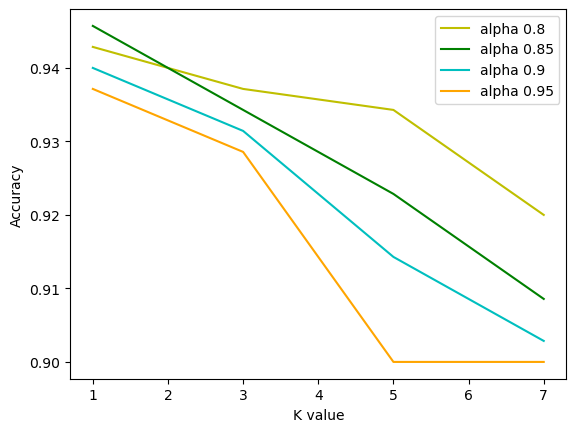

[0.9371428571428572, 0.9285714285714286, 0.9, 0.9]


In [97]:
k_nearest=[1,3,5,7]


scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced8bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced8bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'y', label ='alpha 0.8')

scores8.append(np.array(scores))
print(scores)



scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced85bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced85bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'g', label ='alpha 0.85')

scores85.append(np.array(scores))


print(scores)



scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced9bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced9bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'c', label ='alpha 0.9')

scores9.append(np.array(scores))

print(scores)



scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced95bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced95bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'orange', label ='alpha 0.95')


plt.legend(loc="upper right")
plt.show()

scores95.append(np.array(scores))

print(scores)

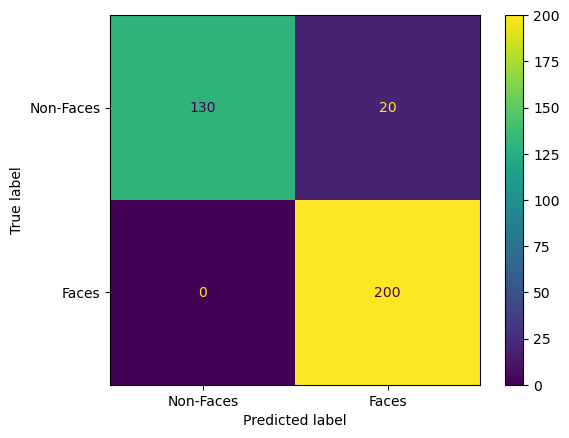

In [98]:
confusion = confusion_matrix(ybin_test, preds8bin)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Non-Faces', 'Faces'])
cm_display.plot()
plt.show()

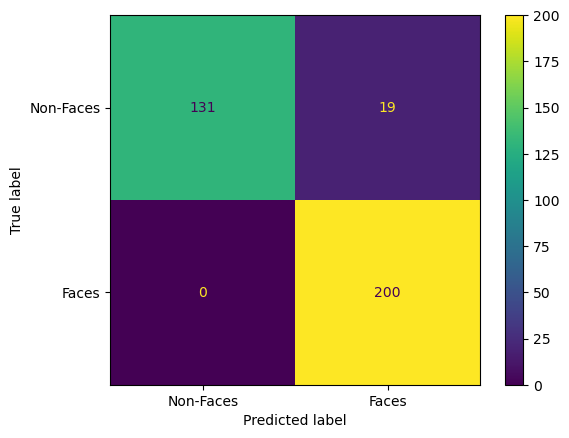

In [99]:
confusion = confusion_matrix(ybin_test, preds85bin)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Non-Faces', 'Faces'])
cm_display.plot()
plt.show()

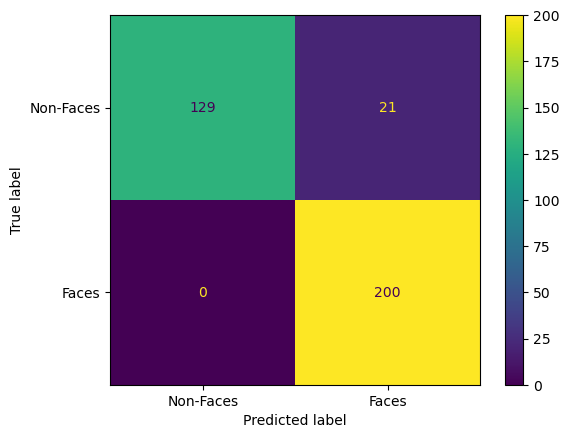

In [100]:
confusion = confusion_matrix(ybin_test, preds9bin)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Non-Faces', 'Faces'])
cm_display.plot()
plt.show()

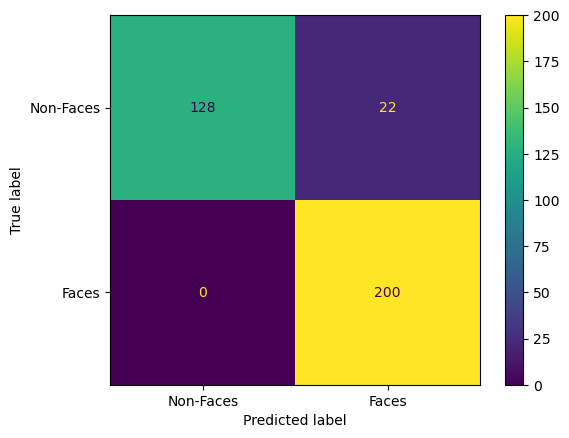

In [101]:
confusion = confusion_matrix(ybin_test, preds95bin)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Non-Faces', 'Faces'])
cm_display.plot()
plt.show()

* 200 non-faces vs 200 faces

for alpha = 0.8 , the number of important eighvectors are = 17
for alpha = 0.9 , the number of important eighvectors are = 57
for alpha = 0.95 , the number of important eighvectors are = 119
for alpha = 0.85 , the number of important eighvectors are = 30
200 non-faces vs 200 faces
accuracy for alpha=0.95   is 0.9675
accuracy for alpha=0.9  is 0.965
accuracy for alpha=0.85  is 0.96
accuracy for alpha=0.8  is 0.9625
[0.9625, 0.95, 0.9425, 0.93]
[0.96, 0.945, 0.94, 0.9275]
[0.965, 0.945, 0.925, 0.915]


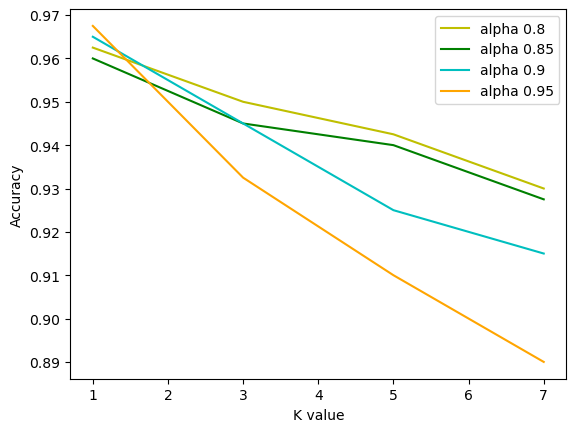

[0.9675, 0.9325, 0.91, 0.89]


In [102]:
adidas = importResizeImages('/kaggle/input/nike-adidas-and-converse-imaged/train/adidas',100)
furniture = importResizeImages('/kaggle/input/furniture-images-dataset/furniture_images/furniture_images',100)
coca =importResizeImages('/kaggle/input/pepsi-and-cocacola-images/train/cocacola',100)
pepsi = importResizeImages('/kaggle/input/pepsi-and-cocacola-images/train/pepsi',100)

nonfaces = np.concatenate((adidas, furniture, coca, pepsi), axis=0)

bin_data=np.concatenate((X,nonfaces))

bin_labels=np.concatenate((np.ones((400,1)),np.zeros((400,1))))

#from sklearn.model_selection import train_test_split
Xbin_train, Xbin_test, ybin_train, ybin_test = train_test_split(bin_data, bin_labels,
                                                    stratify=bin_labels, 
                                                    test_size=0.5)


pca_8bin=PCA(0.8)
eigvectors_8bin=pca_8bin.fit(Xbin_train)
x_train_reduced8bin=pca_8bin.project(Xbin_train)
x_test_reduced8bin=pca_8bin.project(Xbin_test)
neigh8bin = KNeighborsClassifier(n_neighbors=1)
neigh8bin.fit(x_train_reduced8bin, ybin_train.ravel())
preds8bin=neigh8bin.predict(x_test_reduced8bin)

pca_9bin=PCA(0.9)
eigvectors_9bin=pca_9bin.fit(Xbin_train)
x_train_reduced9bin=pca_9bin.project(Xbin_train)
x_test_reduced9bin=pca_9bin.project(Xbin_test)
neigh9bin = KNeighborsClassifier(n_neighbors=1)
neigh9bin.fit(x_train_reduced9bin, ybin_train.ravel())
preds9bin=neigh9bin.predict(x_test_reduced9bin)


pca_95bin=PCA(0.95)
eigvectors_95bin=pca_95bin.fit(Xbin_train)
x_train_reduced95bin=pca_95bin.project(Xbin_train)
x_test_reduced95bin=pca_95bin.project(Xbin_test)
neigh95bin = KNeighborsClassifier(n_neighbors=1)
neigh95bin.fit(x_train_reduced95bin, ybin_train.ravel())
preds95bin=neigh95bin.predict(x_test_reduced95bin)

pca_85bin=PCA(0.85)
eigvectors_85bin=pca_85bin.fit(Xbin_train)
x_train_reduced85bin=pca_85bin.project(Xbin_train)
x_test_reduced85bin=pca_85bin.project(Xbin_test)
neigh85bin = KNeighborsClassifier(n_neighbors=1)
neigh85bin.fit(x_train_reduced85bin, ybin_train.ravel())
preds85bin=neigh85bin.predict(x_test_reduced85bin)


print('200 non-faces vs 200 faces')
print(f'accuracy for alpha=0.95   is {accuracy_score(ybin_test, preds95bin)}')
print(f'accuracy for alpha=0.9  is {accuracy_score(ybin_test, preds9bin)}')
print(f'accuracy for alpha=0.85  is {accuracy_score(ybin_test, preds85bin)}')
print(f'accuracy for alpha=0.8  is {accuracy_score(ybin_test, preds8bin)}')



scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced8bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced8bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'y', label ='alpha 0.8')

scores8.append(np.array(scores))
print(scores)



scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced85bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced85bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'g', label ='alpha 0.85')

scores85.append(np.array(scores))


print(scores)



scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced9bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced9bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'c', label ='alpha 0.9')

scores9.append(np.array(scores))

print(scores)



scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced95bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced95bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'orange', label ='alpha 0.95')


plt.legend(loc="upper right")
plt.show()

scores95.append(np.array(scores))

print(scores)

* 340 non faces vs 200 faces

for alpha = 0.8 , the number of important eighvectors are = 15
for alpha = 0.9 , the number of important eighvectors are = 58
for alpha = 0.95 , the number of important eighvectors are = 135
for alpha = 0.85 , the number of important eighvectors are = 29
340 non-faces vs 200 faces
accuracy for alpha=0.95   is 0.937037037037037
accuracy for alpha=0.9  is 0.9388888888888889
accuracy for alpha=0.85  is 0.9333333333333333
accuracy for alpha=0.8  is 0.95
[0.95, 0.9351851851851852, 0.9222222222222223, 0.9185185185185185]
[0.9333333333333333, 0.9277777777777778, 0.9203703703703704, 0.9185185185185185]
[0.9388888888888889, 0.9277777777777778, 0.9148148148148149, 0.9055555555555556]


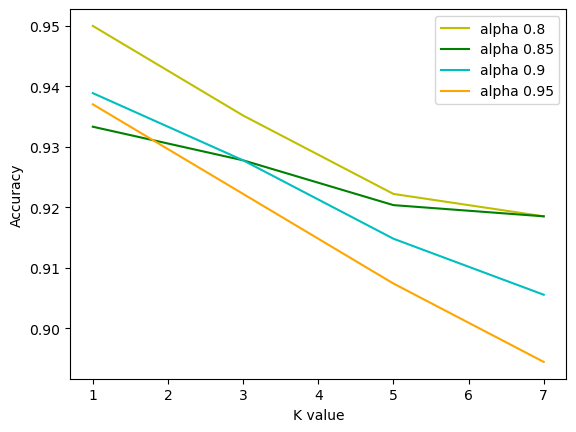

[0.937037037037037, 0.9222222222222223, 0.9074074074074074, 0.8944444444444445]


In [103]:
adidas = importResizeImages('/kaggle/input/nike-adidas-and-converse-imaged/train/adidas',170)
furniture = importResizeImages('/kaggle/input/furniture-images-dataset/furniture_images/furniture_images',170)
coca =importResizeImages('/kaggle/input/pepsi-and-cocacola-images/train/cocacola',170)
pepsi = importResizeImages('/kaggle/input/pepsi-and-cocacola-images/train/pepsi',170)

nonfaces = np.concatenate((adidas, furniture, coca, pepsi), axis=0)

bin_data=np.concatenate((X,nonfaces))

bin_labels=np.concatenate((np.ones((400,1)),np.zeros((680,1))))

#from sklearn.model_selection import train_test_split
Xbin_train, Xbin_test, ybin_train, ybin_test = train_test_split(bin_data, bin_labels,
                                                    stratify=bin_labels, 
                                                    test_size=0.5)


pca_8bin=PCA(0.8)
eigvectors_8bin=pca_8bin.fit(Xbin_train)
x_train_reduced8bin=pca_8bin.project(Xbin_train)
x_test_reduced8bin=pca_8bin.project(Xbin_test)
neigh8bin = KNeighborsClassifier(n_neighbors=1)
neigh8bin.fit(x_train_reduced8bin, ybin_train.ravel())
preds8bin=neigh8bin.predict(x_test_reduced8bin)

pca_9bin=PCA(0.9)
eigvectors_9bin=pca_9bin.fit(Xbin_train)
x_train_reduced9bin=pca_9bin.project(Xbin_train)
x_test_reduced9bin=pca_9bin.project(Xbin_test)
neigh9bin = KNeighborsClassifier(n_neighbors=1)
neigh9bin.fit(x_train_reduced9bin, ybin_train.ravel())
preds9bin=neigh9bin.predict(x_test_reduced9bin)


pca_95bin=PCA(0.95)
eigvectors_95bin=pca_95bin.fit(Xbin_train)
x_train_reduced95bin=pca_95bin.project(Xbin_train)
x_test_reduced95bin=pca_95bin.project(Xbin_test)
neigh95bin = KNeighborsClassifier(n_neighbors=1)
neigh95bin.fit(x_train_reduced95bin, ybin_train.ravel())
preds95bin=neigh95bin.predict(x_test_reduced95bin)

pca_85bin=PCA(0.85)
eigvectors_85bin=pca_85bin.fit(Xbin_train)
x_train_reduced85bin=pca_85bin.project(Xbin_train)
x_test_reduced85bin=pca_85bin.project(Xbin_test)
neigh85bin = KNeighborsClassifier(n_neighbors=1)
neigh85bin.fit(x_train_reduced85bin, ybin_train.ravel())
preds85bin=neigh85bin.predict(x_test_reduced85bin)


print('340 non-faces vs 200 faces')
print(f'accuracy for alpha=0.95   is {accuracy_score(ybin_test, preds95bin)}')
print(f'accuracy for alpha=0.9  is {accuracy_score(ybin_test, preds9bin)}')
print(f'accuracy for alpha=0.85  is {accuracy_score(ybin_test, preds85bin)}')
print(f'accuracy for alpha=0.8  is {accuracy_score(ybin_test, preds8bin)}')



scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced8bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced8bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'y', label ='alpha 0.8')

scores8.append(np.array(scores))
print(scores)



scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced85bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced85bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'g', label ='alpha 0.85')

scores85.append(np.array(scores))


print(scores)



scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced9bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced9bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'c', label ='alpha 0.9')

scores9.append(np.array(scores))

print(scores)



scores=[]
for k in k_nearest:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_reduced95bin,ybin_train.ravel())
    preds=classifier.predict(x_test_reduced95bin)
    scores.append(accuracy_score(ybin_test, preds))
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(k_nearest,scores, color = 'orange', label ='alpha 0.95')


plt.legend(loc="upper right")
plt.show()

scores95.append(np.array(scores))

print(scores)

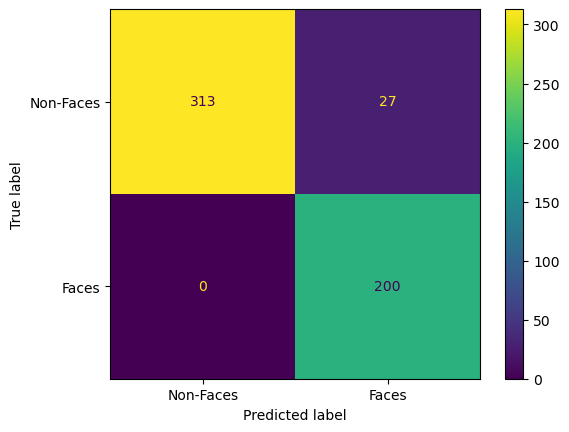

In [104]:
confusion = confusion_matrix(ybin_test, preds8bin)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Non-Faces', 'Faces'])
cm_display.plot()
plt.show()

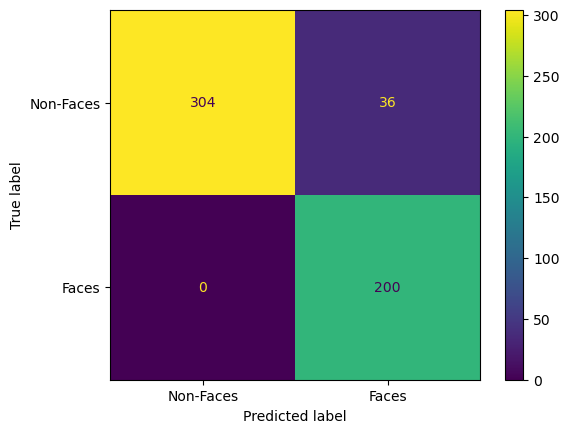

In [105]:
confusion = confusion_matrix(ybin_test, preds85bin)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Non-Faces', 'Faces'])
cm_display.plot()
plt.show()

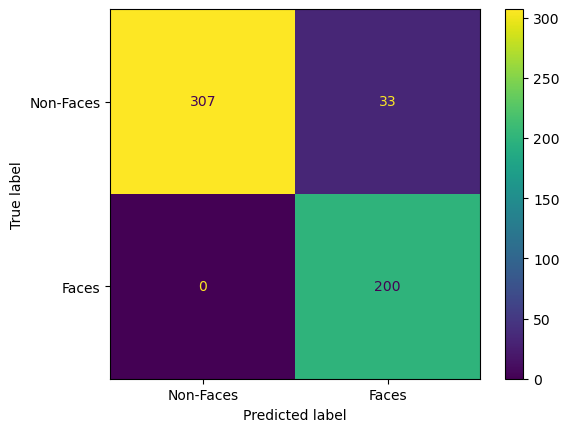

In [106]:
confusion = confusion_matrix(ybin_test, preds9bin)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Non-Faces', 'Faces'])
cm_display.plot()
plt.show()

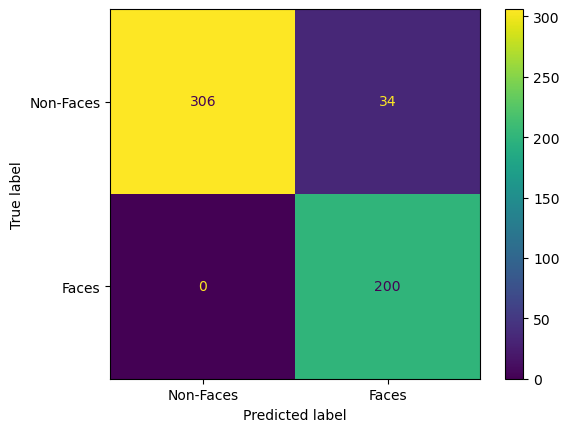

In [107]:
confusion = confusion_matrix(ybin_test, preds95bin)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Non-Faces', 'Faces'])
cm_display.plot()
plt.show()

In [108]:
def listToNumpy(scores):
    numpyList=scores[0]
    for score in scores[1:]:
        numpyList=np.vstack((numpyList,score))
    return numpyList
        

In [109]:
scores8=listToNumpy(scores8)
scores85=listToNumpy(scores85)
scores9=listToNumpy(scores9)
scores95=listToNumpy(scores95)

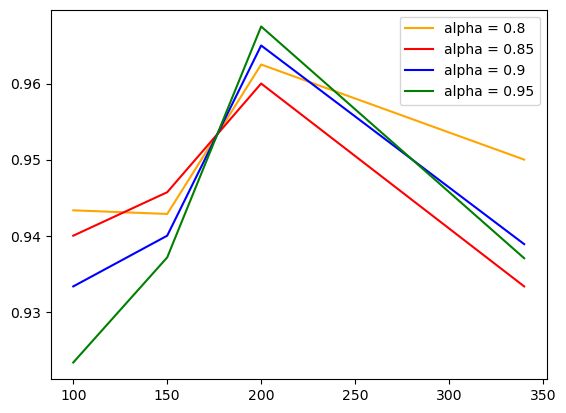

In [110]:
plt.plot(noOfNonFaces,scores8[:,0],color="orange",label="alpha = 0.8")
plt.plot(noOfNonFaces,scores85[:,0],color="red",label="alpha = 0.85")
plt.plot(noOfNonFaces,scores9[:,0],color="blue",label="alpha = 0.9")
plt.plot(noOfNonFaces,scores95[:,0],color="green",label="alpha = 0.95")

plt.legend(loc="upper right")
plt.show()

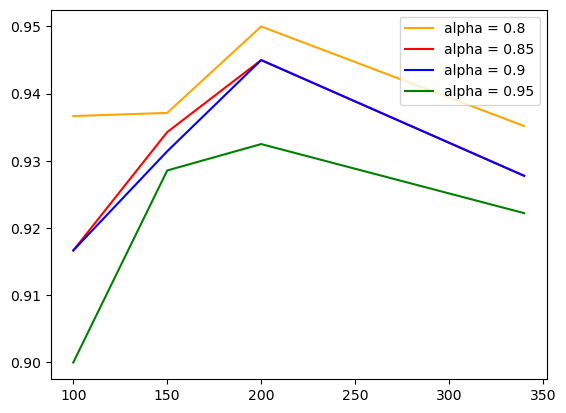

In [111]:
plt.plot(noOfNonFaces,scores8[:,1],color="orange",label="alpha = 0.8")
plt.plot(noOfNonFaces,scores85[:,1],color="red",label="alpha = 0.85")
plt.plot(noOfNonFaces,scores9[:,1],color="blue",label="alpha = 0.9")
plt.plot(noOfNonFaces,scores95[:,1],color="green",label="alpha = 0.95")

plt.legend(loc="upper right")
plt.show()

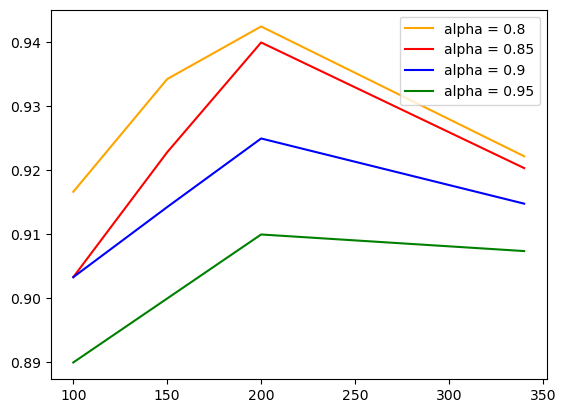

In [112]:
plt.plot(noOfNonFaces,scores8[:,2],color="orange",label="alpha = 0.8")
plt.plot(noOfNonFaces,scores85[:,2],color="red",label="alpha = 0.85")
plt.plot(noOfNonFaces,scores9[:,2],color="blue",label="alpha = 0.9")
plt.plot(noOfNonFaces,scores95[:,2],color="green",label="alpha = 0.95")

plt.legend(loc="upper right")
plt.show()

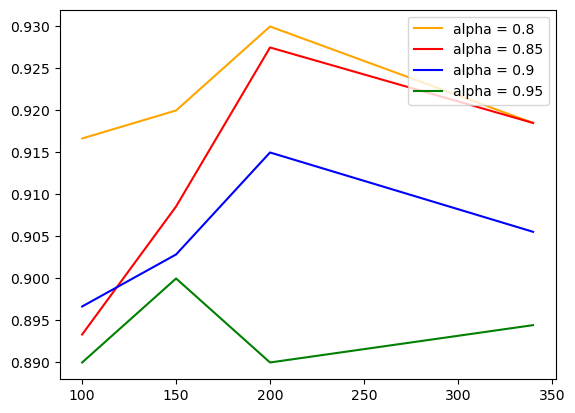

In [113]:
plt.plot(noOfNonFaces,scores8[:,3],color="orange",label="alpha = 0.8")
plt.plot(noOfNonFaces,scores85[:,3],color="red",label="alpha = 0.85")
plt.plot(noOfNonFaces,scores9[:,3],color="blue",label="alpha = 0.9")
plt.plot(noOfNonFaces,scores95[:,3],color="green",label="alpha = 0.95")

plt.legend(loc="upper right")
plt.show()

In [114]:
del pca_8bin,eigvectors_8bin,x_train_reduced8bin,x_test_reduced8bin,neigh8bin,preds8bin
del pca_85bin,eigvectors_85bin,x_train_reduced85bin,x_test_reduced85bin,neigh85bin,preds85bin
del pca_9bin,eigvectors_9bin,x_train_reduced9bin,x_test_reduced9bin,neigh9bin,preds9bin
del pca_95bin,eigvectors_95bin,x_train_reduced95bin,x_test_reduced95bin,neigh95bin,preds95bin


**Bonus PCA**

In [115]:
neighbours=list(range(1,500,1))
scores=[]
for n in neighbours :
    pca=KernelPCA(n_components=n,kernel='poly',degree=2) 
    pca.fit(x_train)
    x_test_reduced=pca.transform(x_test)
    x_train_reduced=pca.transform(x_train)
    neig=KNeighborsClassifier(1)
    neig.fit(x_train_reduced,y_train.ravel())
    preds=neig.predict(x_test_reduced)
    scores.append(accuracy_score(y_test,preds))

the best accuracy =0.965
was for n_components=48


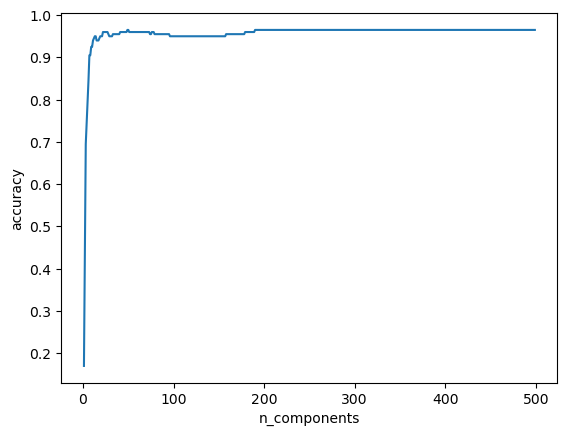

In [116]:
print(f'the best accuracy ={scores[np.argmax(scores)]}')
print(f'was for n_components={np.argmax(scores)}')
plt.plot(neighbours,scores)
plt.xlabel("n_components")
plt.ylabel("accuracy")
plt.show()

In [117]:
numberOfEig=[36,52,76,116]
for n in numberOfEig:
    pca=KernelPCA(n_components=n,kernel='poly',degree=2) 
    pca.fit(x_train)
    x_test_reduced=pca.transform(x_test)
    x_train_reduced=pca.transform(x_train)
    neig=KNeighborsClassifier(1)
    neig.fit(x_train_reduced,y_train.ravel())
    preds=neig.predict(x_test_reduced)
    print(f'for n ={n} and accuracy = {accuracy_score(y_test,preds)} ')

for n =36 and accuracy = 0.955 
for n =52 and accuracy = 0.96 
for n =76 and accuracy = 0.96 
for n =116 and accuracy = 0.95 


In [118]:
#from sklearn.decomposition import KernelPCA
pca=KernelPCA(n_components=np.argmax(scores),kernel='poly',degree=2) 
pca.fit(x_train)
x_test_reduced=pca.transform(x_test)
x_train_reduced=pca.transform(x_train)
k_nearst=[1,3,5,7,9]
for k in k_nearst:
    neig=KNeighborsClassifier(k)
    neig.fit(x_train_reduced,y_train.ravel())
    preds=neig.predict(x_test_reduced)
    print(f'for n ={k} and accuracy = {accuracy_score(y_test,preds)} ')


for n =1 and accuracy = 0.96 
for n =3 and accuracy = 0.905 
for n =5 and accuracy = 0.815 
for n =7 and accuracy = 0.77 
for n =9 and accuracy = 0.69 
